# Import Libraries

In [469]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Load data

In [470]:
# Load the dataset
shopeasy_df = pd.read_csv('shopEasy.csv')

# Display the first five rows of the dataset
shopeasy_df.head()

personId  accountTotal  frequencyIndex  itemCosts  singleItemCosts  \
0   C10573   1034.660626        0.833333    1308.11          1308.11   
1   C16889    777.853474        0.666667       0.00             0.00   
2   C12964     97.453056        0.818182     334.73           334.73   
3   C11171      0.000000        0.000000      12.65             0.00   
4   C17582     18.120946        0.500000      57.00            57.00   

   multipleItemCosts  emergencyFunds  itemBuyFrequency  \
0               0.00      234.602843          0.500000   
1               0.00     1820.143378          0.000000   
2               0.00       19.551802          0.083333   
3              12.65        0.000000          0.083333   
4               0.00        0.000000          0.166667   

   singleItemBuyFrequency  multipleItemBuyFrequency  ...  emergencyCount  \
0                0.500000                  0.000000  ...               1   
1                0.000000                  0.000000  ...               8   
2                0.083333                  0.000000  ...               1   
3                0.000000                  0.083333  ...               0   
4                0.166667                  0.000000  ...               0   

   itemCount  maxSpendLimit  monthlyPaid  leastAmountPaid  \
0          8         1500.0   236.764555       207.007715   
1          0         2000.0    89.741508       173.276205   
2          1         2500.0   234.271939       117.297542   
3          1         5000.0     0.000000              NaN   
4          1         1500.0   118.438703        54.138711   

   paymentCompletionRate  accountLifespan     location accountType webUsage  
0                   0.00                6     New York     Premium       60  
1                   0.00                6  Los Angeles     Premium        5  
2                   0.25               12     New York     Student       21  
3                   0.00               12      Chicago     Premium       53  
4                   0.00                6     New York     Premium       59  

[5 rows x 21 columns]

# Look at data

In [471]:
print(f'There are {shopeasy_df.shape[0]} rows and {shopeasy_df.shape[1]} columns in the dataset.')

There are 8950 rows and 21 columns in the dataset.


In [472]:
shopeasy_df.describe().T

count         mean          std        min  \
accountTotal              8950.0  1564.474828  2081.531879   0.000000   
frequencyIndex            8950.0     0.877271     0.236904   0.000000   
itemCosts                 8950.0  1003.204834  2136.634782   0.000000   
singleItemCosts           8950.0   592.437371  1659.887917   0.000000   
multipleItemCosts         8950.0   411.067645   904.338115   0.000000   
emergencyFunds            8950.0   978.871112  2097.163877   0.000000   
itemBuyFrequency          8950.0     0.490351     0.401371   0.000000   
singleItemBuyFrequency    8950.0     0.202458     0.298336   0.000000   
multipleItemBuyFrequency  8950.0     0.364437     0.397448   0.000000   
emergencyUseFrequency     8950.0     0.135144     0.200121   0.000000   
emergencyCount            8950.0     3.248827     6.824647   0.000000   
itemCount                 8950.0    14.709832    24.857649   0.000000   
maxSpendLimit             8949.0  4494.449450  3638.815725  50.000000   
monthlyPaid               8950.0  1733.143852  2895.063757   0.000000   
leastAmountPaid           8637.0   864.206542  2372.446607   0.019163   
paymentCompletionRate     8950.0     0.153715     0.292499   0.000000   
accountLifespan           8950.0    11.517318     1.338331   6.000000   
webUsage                  8950.0    49.422570    28.808219   0.000000   

                                  25%          50%          75%          max  
accountTotal               128.281915   873.385231  2054.140036  19043.13856  
frequencyIndex               0.888889     1.000000     1.000000      1.00000  
itemCosts                   39.635000   361.280000  1110.130000  49039.57000  
singleItemCosts              0.000000    38.000000   577.405000  40761.25000  
multipleItemCosts            0.000000    89.000000   468.637500  22500.00000  
emergencyFunds               0.000000     0.000000  1113.821139  47137.21176  
itemBuyFrequency             0.083333     0.500000     0.916667      1.00000  
singleItemBuyFrequency       0.000000     0.083333     0.300000      1.00000  
multipleItemBuyFrequency     0.000000     0.166667     0.750000      1.00000  
emergencyUseFrequency        0.000000     0.000000     0.222222      1.50000  
emergencyCount               0.000000     0.000000     4.000000    123.00000  
itemCount                    1.000000     7.000000    17.000000    358.00000  
maxSpendLimit             1600.000000  3000.000000  6500.000000  30000.00000  
monthlyPaid                383.276166   856.901546  1901.134317  50721.48336  
leastAmountPaid            169.123707   312.343947   825.485459  76406.20752  
paymentCompletionRate        0.000000     0.000000     0.142857      1.00000  
accountLifespan             12.000000    12.000000    12.000000     12.00000  
webUsage                    24.000000    49.000000    74.000000     99.00000

In [473]:
shopeasy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personId                  8950 non-null   object 
 1   accountTotal              8950 non-null   float64
 2   frequencyIndex            8950 non-null   float64
 3   itemCosts                 8950 non-null   float64
 4   singleItemCosts           8950 non-null   float64
 5   multipleItemCosts         8950 non-null   float64
 6   emergencyFunds            8950 non-null   float64
 7   itemBuyFrequency          8950 non-null   float64
 8   singleItemBuyFrequency    8950 non-null   float64
 9   multipleItemBuyFrequency  8950 non-null   float64
 10  emergencyUseFrequency     8950 non-null   float64
 11  emergencyCount            8950 non-null   int64  
 12  itemCount                 8950 non-null   int64  
 13  maxSpendLimit             8949 non-null   float64
 14  monthlyP

There are three text fields: 'personId', 'location' and 'accountType'

In [474]:
# Check if 'personId' is unique
shopeasy_df["personId"].is_unique

True

'personId' is unique and can be dropped.

In [475]:
#Drop 'personId'
shopeasy_df.drop('personId', axis=1, inplace=True)

In [476]:
# Count NaN values
missing_values = shopeasy_df.isnull().sum()

# Display the count of NaN values per column
print('Missing Values Summary:')
print(missing_values)

Missing Values Summary:
accountTotal                  0
frequencyIndex                0
itemCosts                     0
singleItemCosts               0
multipleItemCosts             0
emergencyFunds                0
itemBuyFrequency              0
singleItemBuyFrequency        0
multipleItemBuyFrequency      0
emergencyUseFrequency         0
emergencyCount                0
itemCount                     0
maxSpendLimit                 1
monthlyPaid                   0
leastAmountPaid             313
paymentCompletionRate         0
accountLifespan               0
location                      0
accountType                   0
webUsage                      0
dtype: int64


'maxSpendLimit' and 'leastAmountPaid' have respectively 1 and 313 missing values.

# Handle missing data

In [477]:
# Drop row with missing value in 'leastAmountPaid'
shopeasy_df.dropna(subset=['maxSpendLimit'], inplace=True)

# shopeasy_df['maxSpendLimit'].fillna(shopeasy_df['maxSpendLimit'].median(), inplace=True)

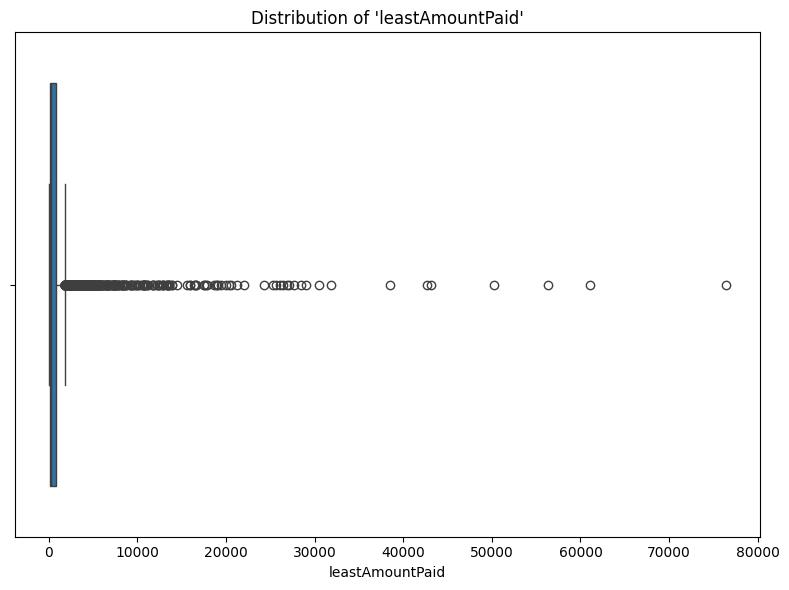

In [478]:
# Distribution of 'leastAmountPaid'
plt.figure(figsize=(8, 6))

sns.boxplot(x=shopeasy_df['leastAmountPaid'])
plt.title("Distribution of 'leastAmountPaid'")

plt.tight_layout()
plt.show()

In [479]:
# Substitute with 0 where 'itemCount' is 0
shopeasy_df.loc[shopeasy_df['itemCount'] == 0, 'leastAmountPaid'] = 0

# Substitute with 'itemCosts' where 'itemCount' is 1
shopeasy_df.loc[shopeasy_df['itemCount'] == 1, 'leastAmountPaid'] = shopeasy_df['itemCosts']

# Substitute with the median for the remaining missing data
shopeasy_df['leastAmountPaid'].fillna(shopeasy_df['leastAmountPaid'].median(), inplace=True)

In [480]:
# Count NaN values after imputation
missing_values_after_imputation = shopeasy_df.isnull().sum()

# Display the count of NaN values per column
print('Missing Values After Imputation Summary:')
print(missing_values_after_imputation)

Missing Values After Imputation Summary:
accountTotal                0
frequencyIndex              0
itemCosts                   0
singleItemCosts             0
multipleItemCosts           0
emergencyFunds              0
itemBuyFrequency            0
singleItemBuyFrequency      0
multipleItemBuyFrequency    0
emergencyUseFrequency       0
emergencyCount              0
itemCount                   0
maxSpendLimit               0
monthlyPaid                 0
leastAmountPaid             0
paymentCompletionRate       0
accountLifespan             0
location                    0
accountType                 0
webUsage                    0
dtype: int64


# Handle categorical data

Categorical features 'location' and 'accountType' need to be encoded because clustering algorithms require numerical inputs.

'location' is a nominal categorical feature with no inherent order.
For enconding 'location' we use One-Hot Encoding to prevent the introduction of artificial ordinality.

'accountType' is an ordinal categorical feature with a meaningful order.
For enconding 'accountType' we use Label Encoding to preserve the inherent order.

In [481]:
# One-hot encoding for 'location'
shopeasy_df_encoded = pd.get_dummies(shopeasy_df, columns=['location'])

# Label encoding for 'accountType'
le = LabelEncoder()
shopeasy_df_encoded['accountType_encoded'] = le.fit_transform(shopeasy_df_encoded['accountType'])

# Drop the original 'accountType' column
shopeasy_df_encoded.drop(['accountType'], axis=1, inplace=True)

# Display the first five rows of the encoded dataframe
shopeasy_df_encoded.head()

accountTotal  frequencyIndex  itemCosts  singleItemCosts  \
0   1034.660626        0.833333    1308.11          1308.11   
1    777.853474        0.666667       0.00             0.00   
2     97.453056        0.818182     334.73           334.73   
3      0.000000        0.000000      12.65             0.00   
4     18.120946        0.500000      57.00            57.00   

   multipleItemCosts  emergencyFunds  itemBuyFrequency  \
0               0.00      234.602843          0.500000   
1               0.00     1820.143378          0.000000   
2               0.00       19.551802          0.083333   
3              12.65        0.000000          0.083333   
4               0.00        0.000000          0.166667   

   singleItemBuyFrequency  multipleItemBuyFrequency  emergencyUseFrequency  \
0                0.500000                  0.000000               0.166667   
1                0.000000                  0.000000               0.500000   
2                0.083333                  0.000000               0.083333   
3                0.000000                  0.083333               0.000000   
4                0.166667                  0.000000               0.000000   

   ...  maxSpendLimit  monthlyPaid  leastAmountPaid  paymentCompletionRate  \
0  ...         1500.0   236.764555       207.007715                   0.00   
1  ...         2000.0    89.741508         0.000000                   0.00   
2  ...         2500.0   234.271939       334.730000                   0.25   
3  ...         5000.0     0.000000        12.650000                   0.00   
4  ...         1500.0   118.438703        57.000000                   0.00   

   accountLifespan  webUsage  location_Chicago  location_Los Angeles  \
0                6        60             False                 False   
1                6         5             False                  True   
2               12        21             False                 False   
3               12        53              True                 False   
4                6        59             False                 False   

   location_New York  accountType_encoded  
0               True                    0  
1              False                    0  
2               True                    2  
3              False                    0  
4               True                    0  

[5 rows x 22 columns]

# Scale data

In [482]:
all_columns = shopeasy_df_encoded.columns.tolist()
num_all_columns = len(all_columns)

numeric_columns = shopeasy_df.select_dtypes(include=['number']).columns.tolist()
num_numeric_columns = len(numeric_columns)

categoric_columns = all_columns[num_numeric_columns:]
num_categoric_columns = len(categoric_columns)

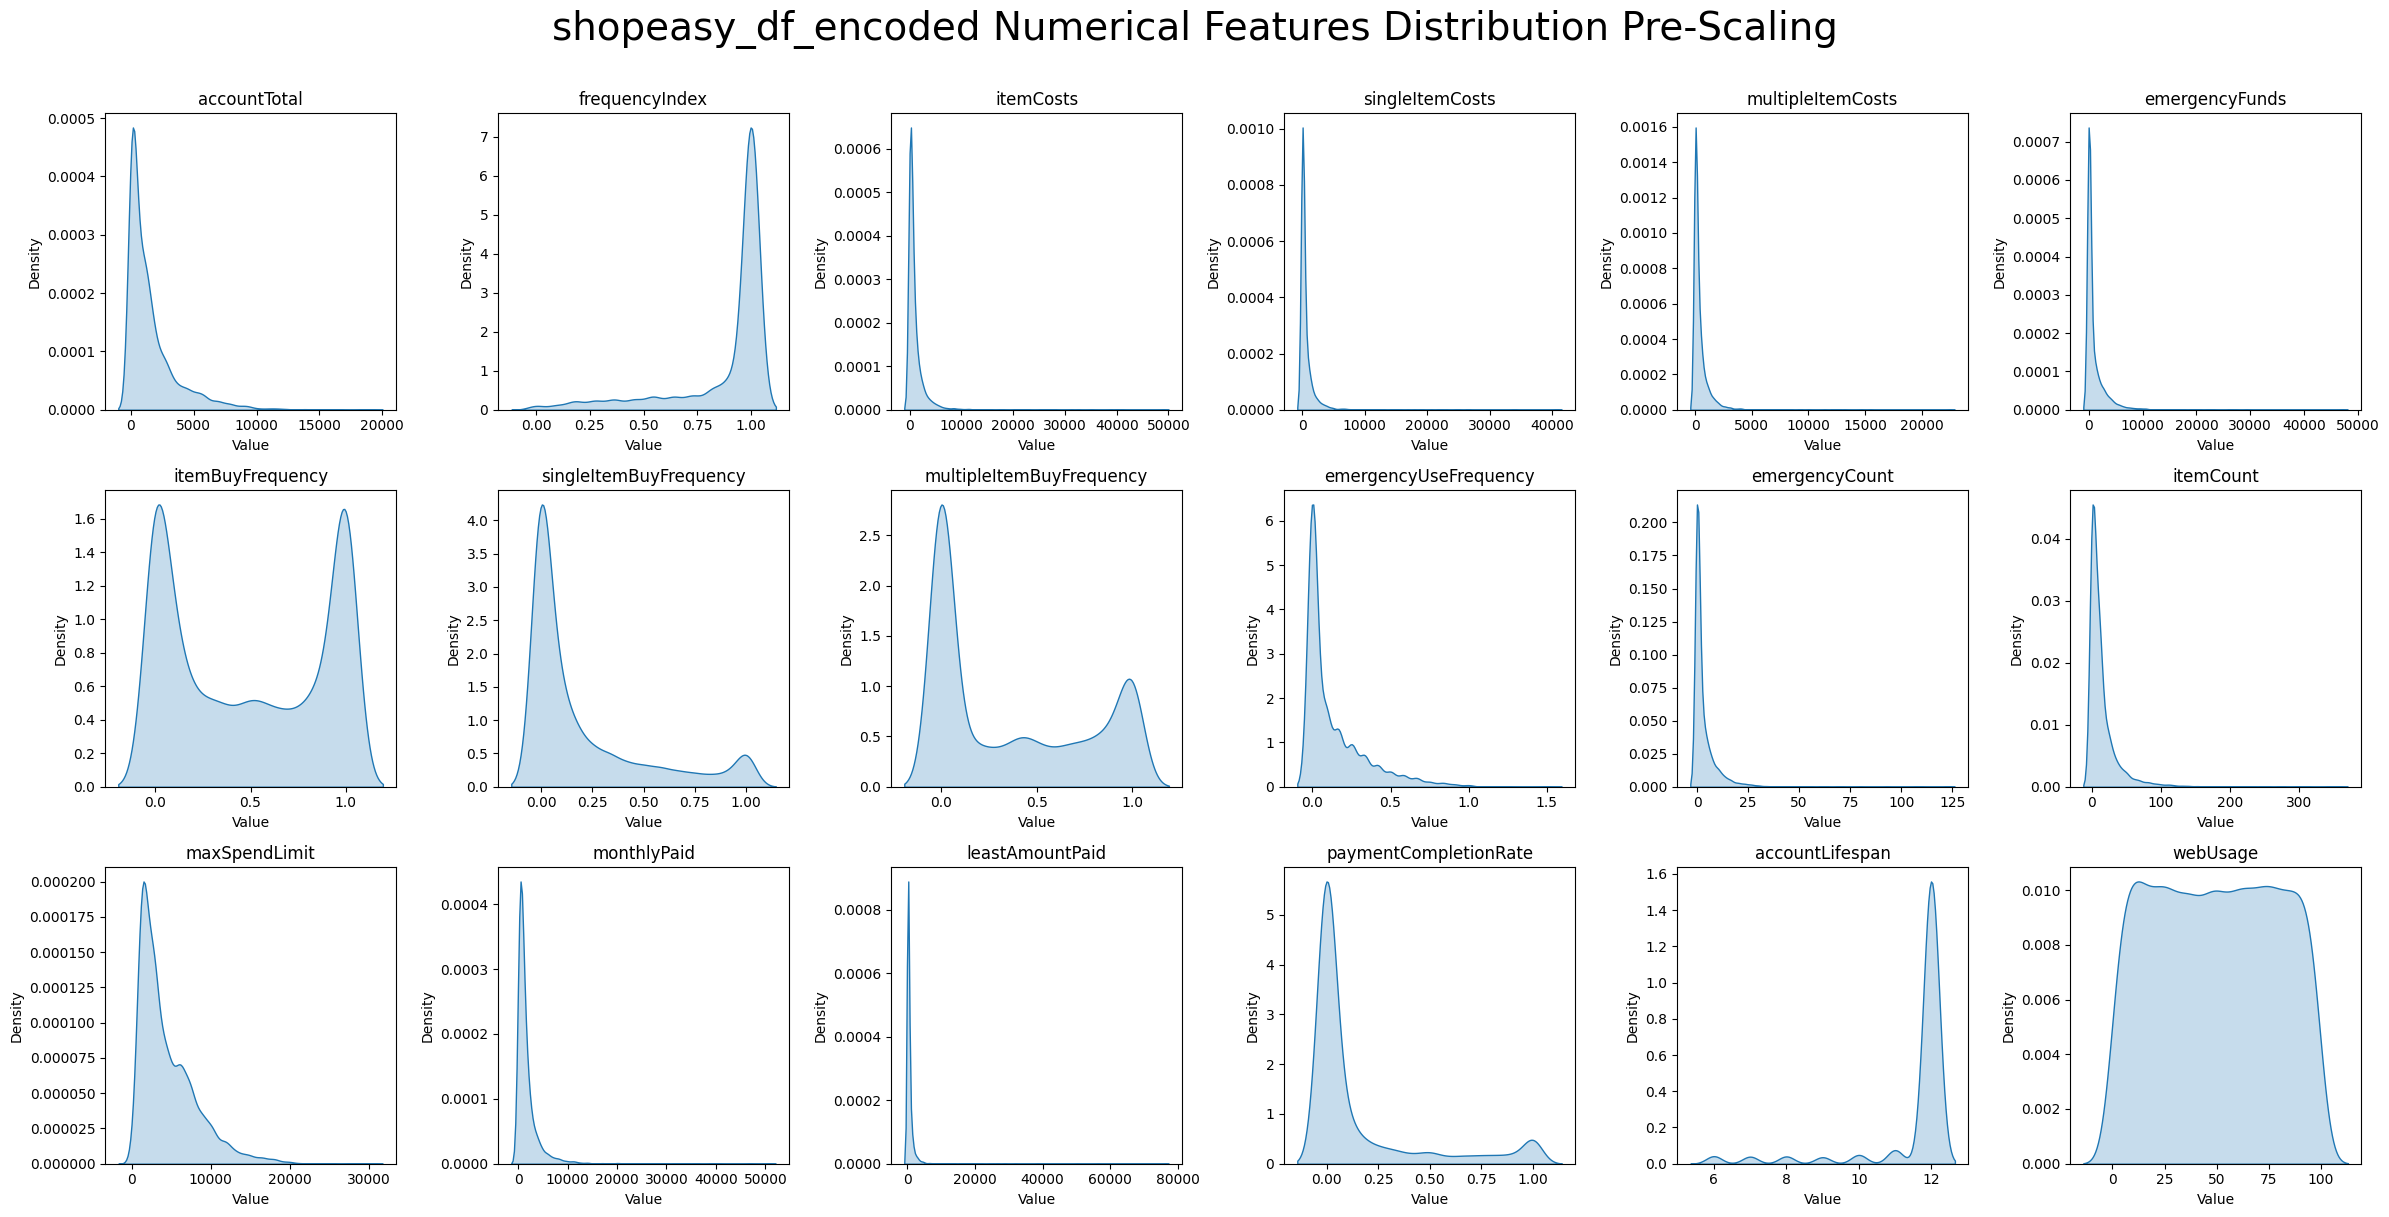

None


In [483]:
# Plot distributions pre-scaling
def plot_distribution(df, title):  
    num_rows = 3
    num_columns_per_row = (num_numeric_columns // num_rows) + (num_numeric_columns % num_rows)

    plt.figure(figsize=(4 * num_columns_per_row, 4 * num_rows)) 

    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(num_rows, num_columns_per_row, i)
        sns.kdeplot(df[column], fill=True)
        plt.title(f'{column}')
        plt.xlabel('Value')
        plt.ylabel('Density')

    plt.suptitle(title, fontsize=28, y=1.01)
    plt.tight_layout()
    plt.show()

print(plot_distribution(shopeasy_df_encoded, 'shopeasy_df_encoded Numerical Features Distribution Pre-Scaling'))

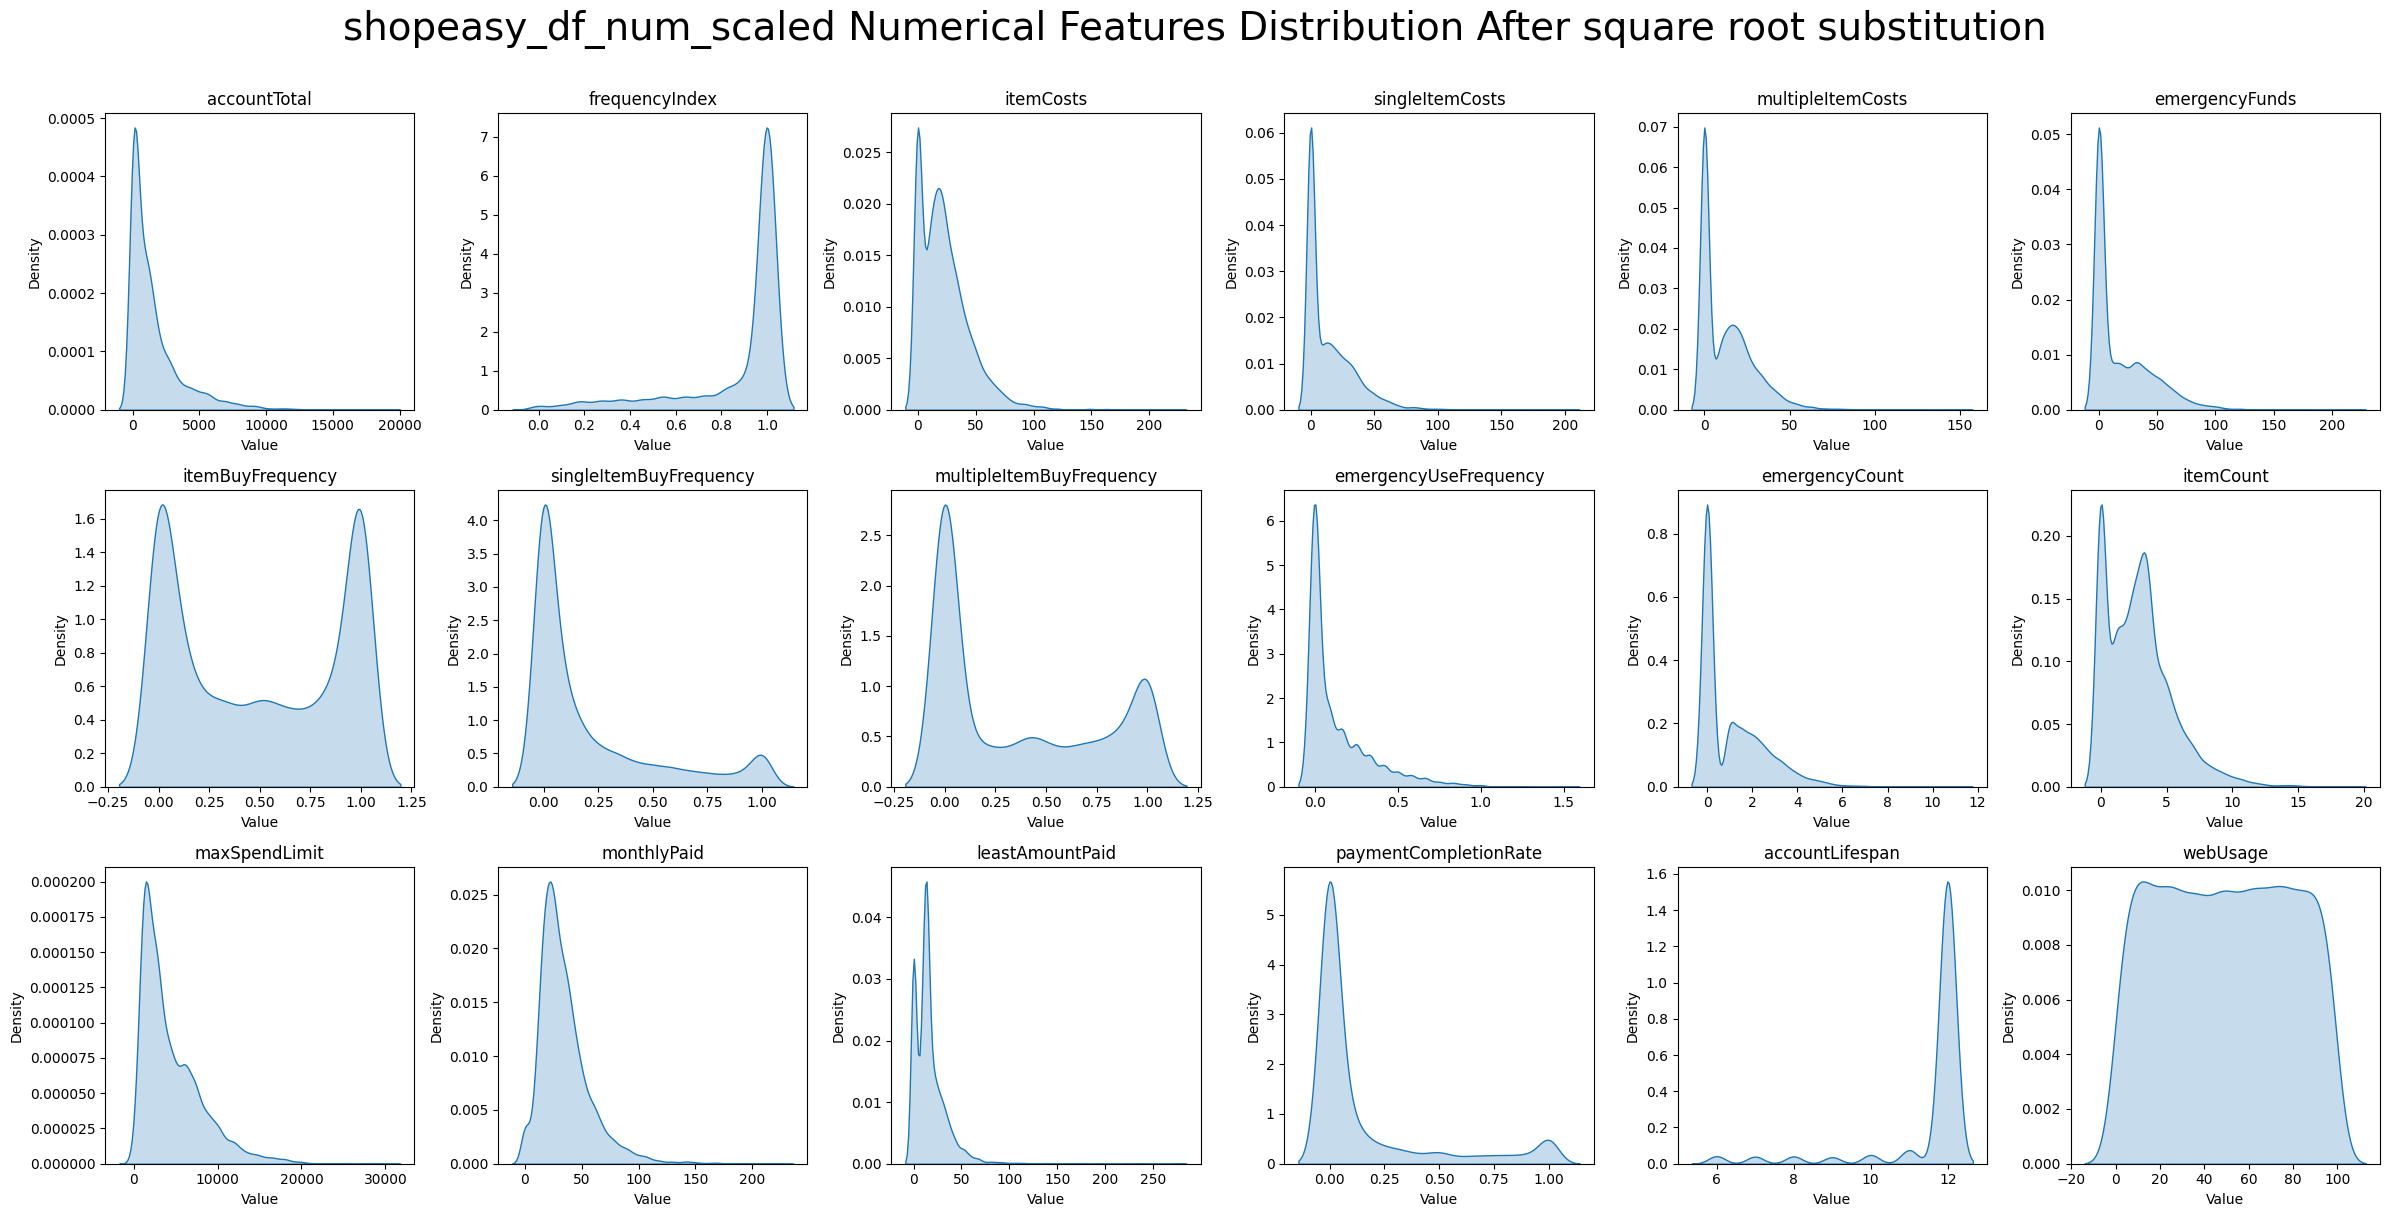

None


In [484]:
# Create scaled dataframe
shopeasy_df_num_scaled = shopeasy_df_encoded[numeric_columns].copy()

# Replace heavy-tailed numerical features with their square root
shopeasy_df_num_scaled["itemCosts"]=np.sqrt(shopeasy_df_num_scaled["itemCosts"])
shopeasy_df_num_scaled["singleItemCosts"]=np.sqrt(shopeasy_df_num_scaled["singleItemCosts"])
shopeasy_df_num_scaled["multipleItemCosts"]=np.sqrt(shopeasy_df_num_scaled["multipleItemCosts"])
shopeasy_df_num_scaled["emergencyFunds"]=np.sqrt(shopeasy_df_num_scaled["emergencyFunds"])
shopeasy_df_num_scaled["emergencyCount"]=np.sqrt(shopeasy_df_num_scaled["emergencyCount"])
shopeasy_df_num_scaled["itemCount"]=np.sqrt(shopeasy_df_num_scaled["itemCount"])
shopeasy_df_num_scaled["monthlyPaid"]=np.sqrt(shopeasy_df_num_scaled["monthlyPaid"])
shopeasy_df_num_scaled["leastAmountPaid"]=np.sqrt(shopeasy_df_num_scaled["leastAmountPaid"])

# Plot distributions after square root substitution
print(plot_distribution(shopeasy_df_num_scaled, 'shopeasy_df_num_scaled Numerical Features Distribution After square root substitution'))

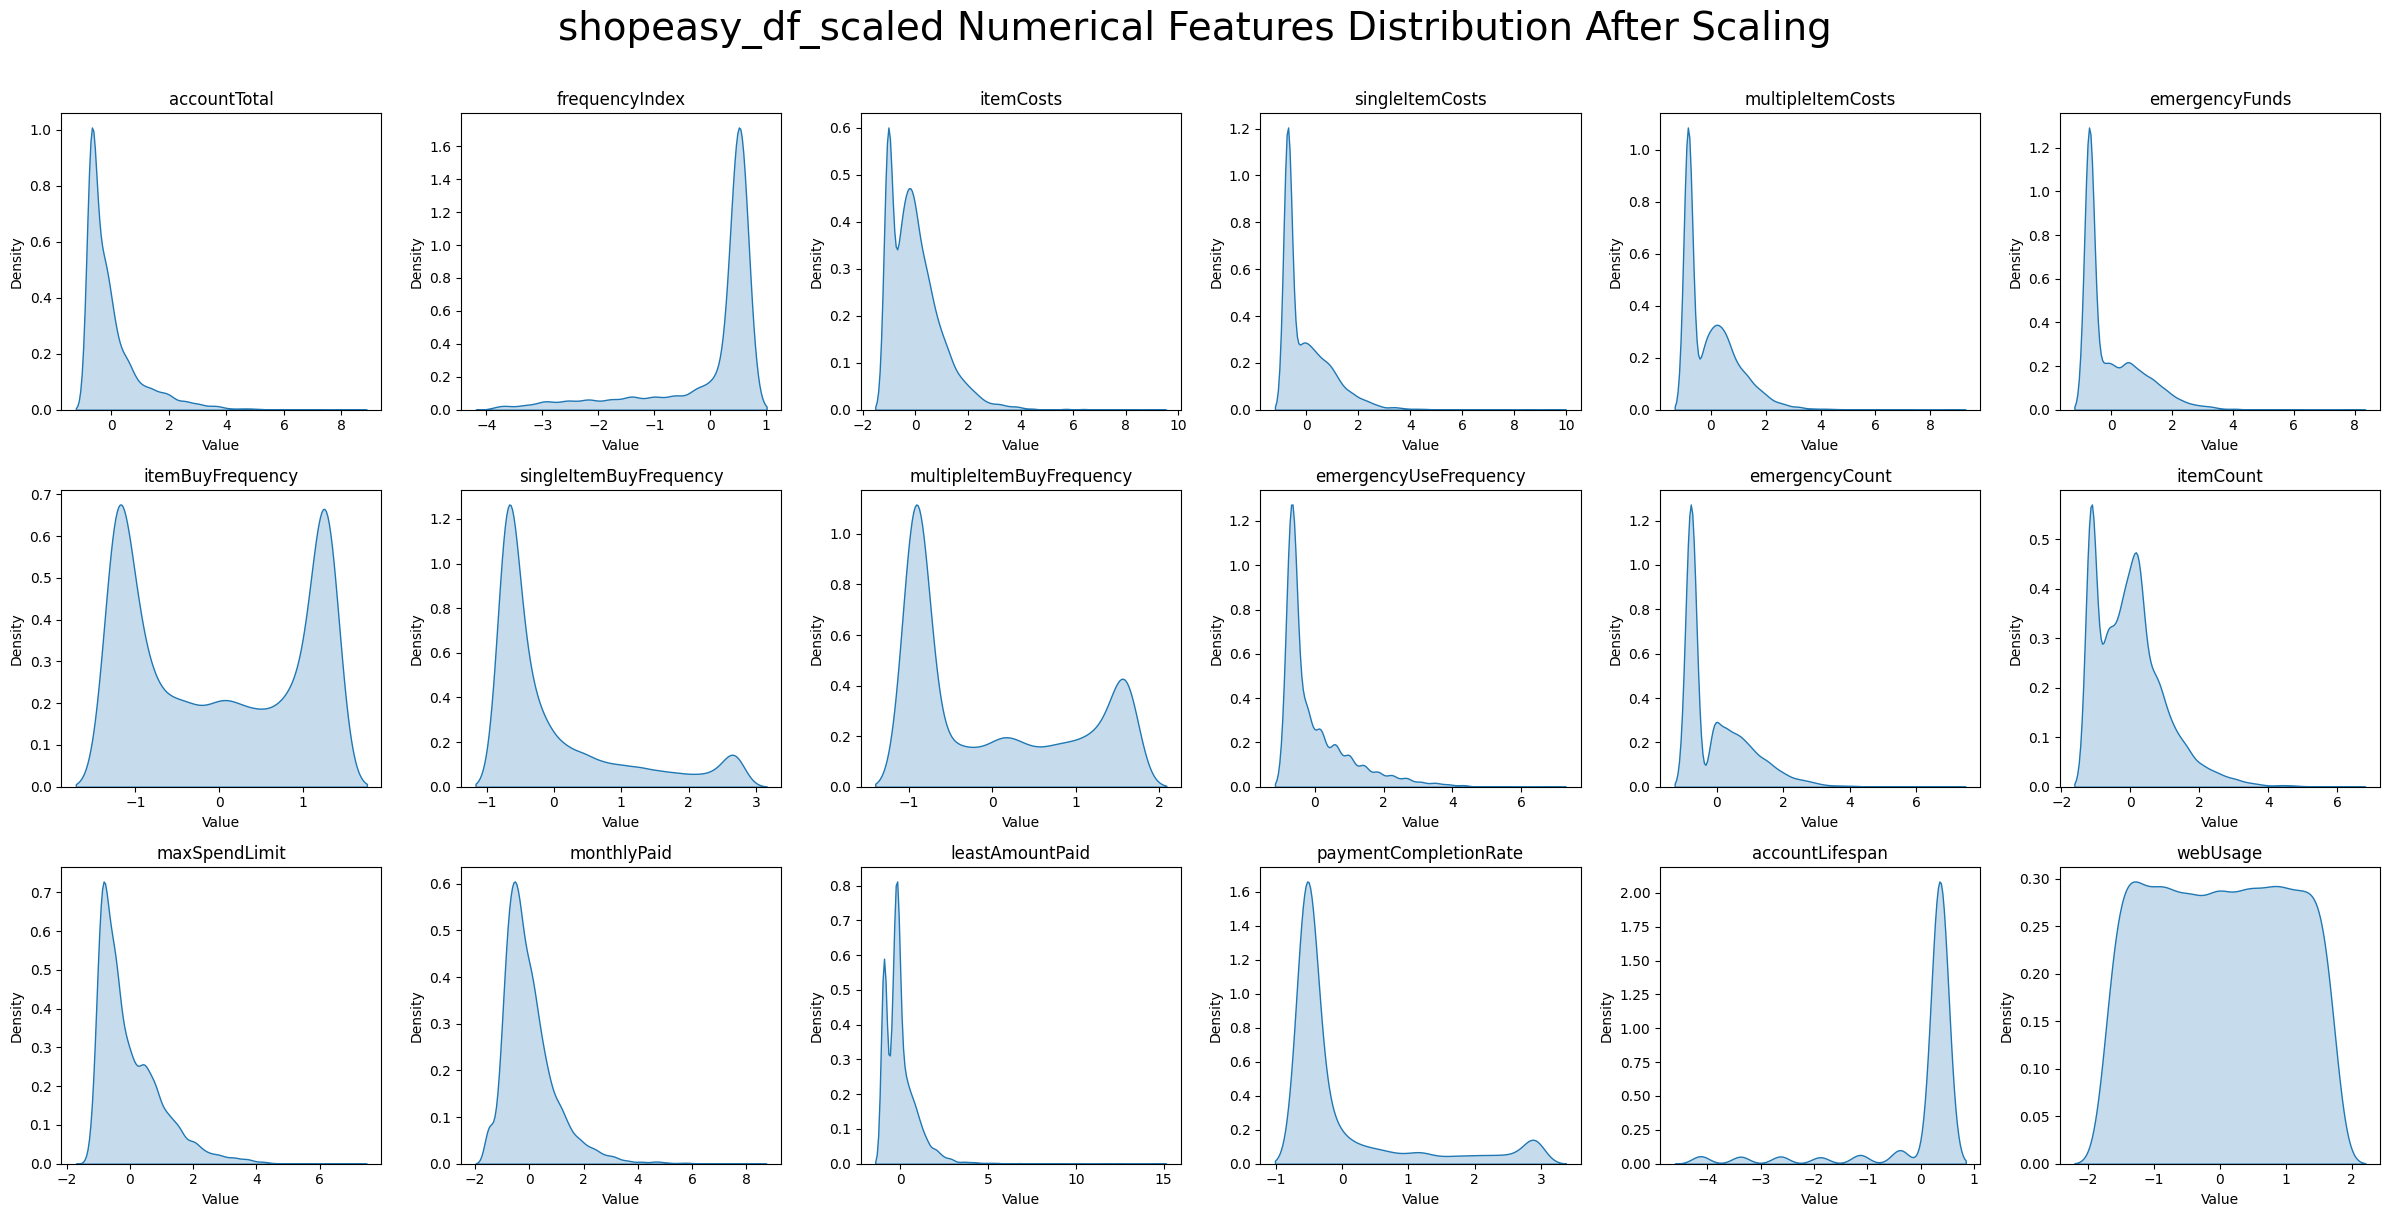

None


In [485]:
# Initialize StandardScaler
scaler = StandardScaler()

# Scale features
shopeasy_df_num_scaled[numeric_columns] = scaler.fit_transform(shopeasy_df_num_scaled[numeric_columns])

# Plot distributions after scaling
print(plot_distribution(shopeasy_df_num_scaled, 'shopeasy_df_scaled Numerical Features Distribution After Scaling'))

In [486]:
# Add categorical features to scaled dataframe
shopeasy_df_categ_data = shopeasy_df_encoded[categoric_columns].to_numpy()
shopeasy_df_scaled = np.concatenate((shopeasy_df_num_scaled, shopeasy_df_categ_data), axis=1)

pd.DataFrame(shopeasy_df_scaled, columns=all_columns).describe()

accountTotal  frequencyIndex    itemCosts  singleItemCosts  \
count    8949.000000      8949.00000  8949.000000      8949.000000   
unique   8870.000000        43.00000  6203.000000      4014.000000   
top        -0.751704         0.51798    -1.042459        -0.724433   
freq       80.000000      6211.00000  2043.000000      4301.000000   

        multipleItemCosts  emergencyFunds  itemBuyFrequency  \
count         8949.000000     8949.000000       8949.000000   
unique        4452.000000     4322.000000         47.000000   
top             -0.837979       -0.732833          1.269742   
freq          3915.000000     4628.000000       2178.000000   

        singleItemBuyFrequency  multipleItemBuyFrequency  \
count              8949.000000                8949.00000   
unique               47.000000                  47.00000   
top                  -0.678716                  -0.91709   
freq               4301.000000                3914.00000   

        emergencyUseFrequency  ...  maxSpendLimit  monthlyPaid  \
count             8949.000000  ...     8949.00000  8949.000000   
unique              54.000000  ...      205.00000  8710.000000   
top                 -0.675294  ...       -0.41072    -1.501064   
freq              4628.000000  ...      784.00000   240.000000   

        leastAmountPaid  paymentCompletionRate  accountLifespan     webUsage  \
count       8949.000000            8949.000000      8949.000000  8949.000000   
unique      6553.000000              47.000000         7.000000   100.000000   
top           -0.934577              -0.525588         0.360541     0.505913   
freq        2045.000000            5902.000000      7584.000000   115.000000   

        location_Chicago  location_Los Angeles location_New York  \
count               8949                  8949              8949   
unique                 2                     2                 2   
top                False                 False             False   
freq                5958                  5988              5952   

       accountType_encoded  
count                 8949  
unique                   3  
top                      0  
freq                  2999  

[4 rows x 22 columns]

In [487]:
# # Selecting columns to scale (excluding one-hot encoded and label encoded columns)
# columns_to_scale = [col for col in shopeasy_df.columns if (col != 'location' and col != 'accountType')]

# # Initializing StandardScaler
# scaler = StandardScaler()

# # Creating a new DataFrame for the scaled version
# shopeasy_df_scaled = shopeasy_df_encoded.copy()
# shopeasy_df_scaled[columns_to_scale] = scaler.fit_transform(shopeasy_df_encoded[columns_to_scale])

# # Displaying the first few rows of the scaled and encoded dataframe
# shopeasy_df_scaled.head()

# Univariate Analysis

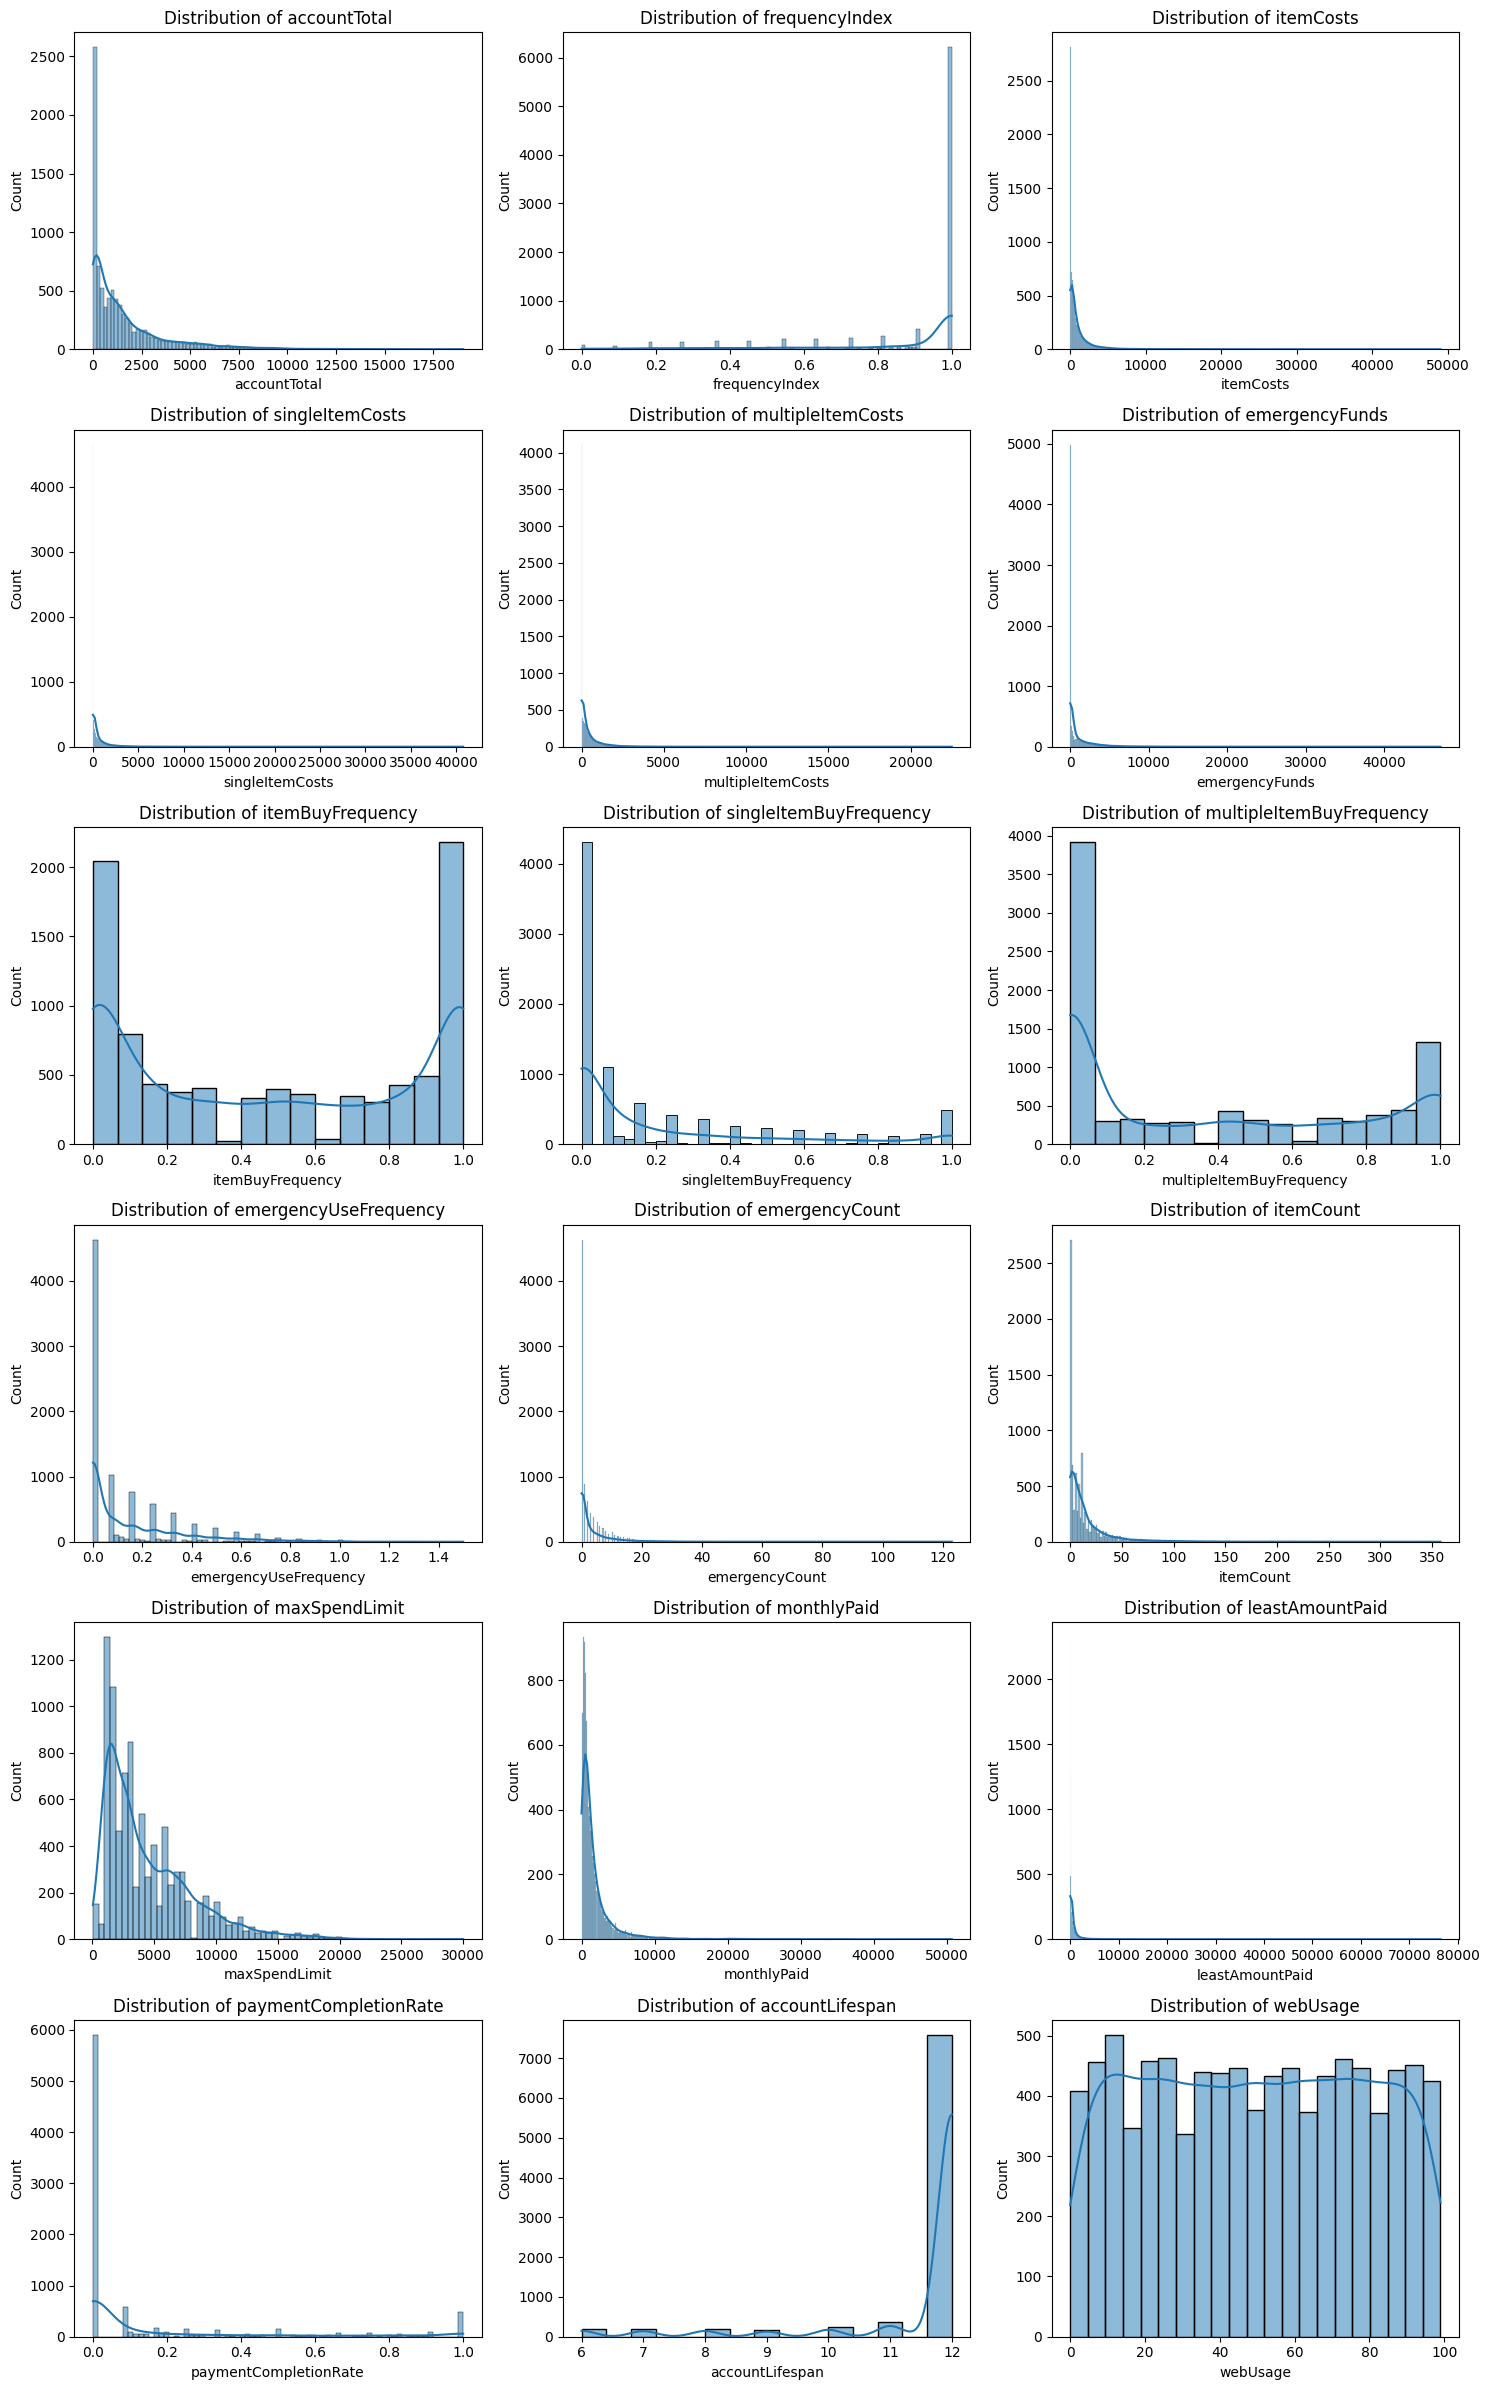

In [488]:
# Selecting numerical features
numerical_features = shopeasy_df.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows/columns for the subplot grid
num_features = len(numerical_features)
ncols = 3
nrows = num_features // ncols + (num_features % ncols > 0)

# Creating subplots
plt.figure(figsize=(15, nrows * 4))

for i, column in enumerate(numerical_features, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(shopeasy_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

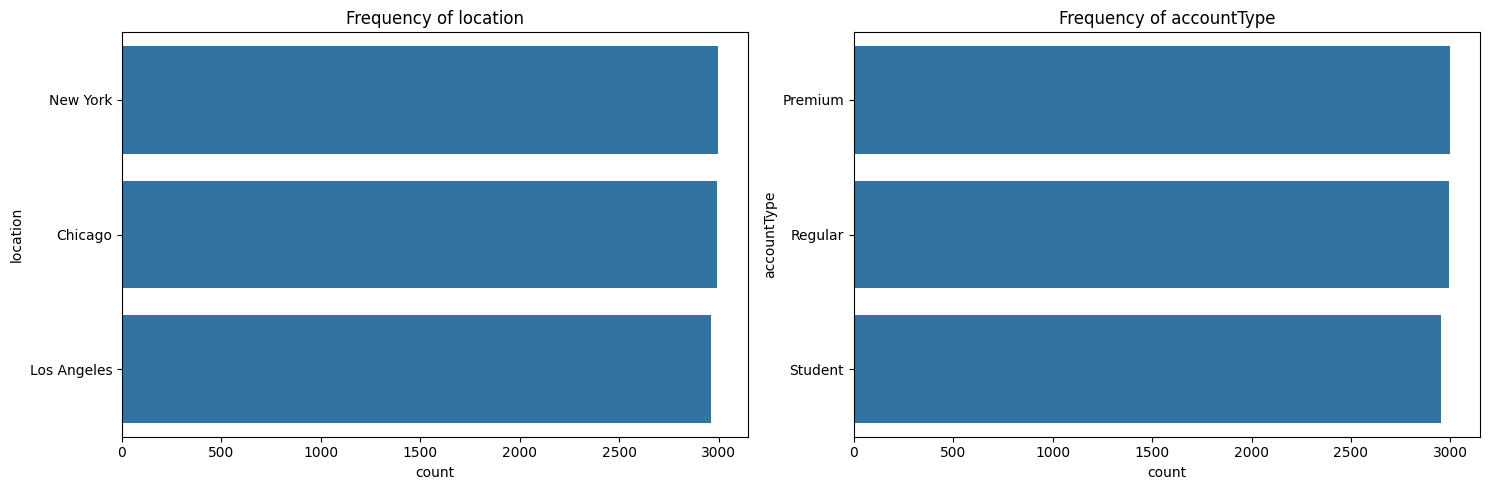

In [489]:
categorical_features = ['location', 'accountType']  # Specify the categorical features you want to plot

# Determine the number of rows/columns for the subplot grid
ncols = 2
nrows = len(categorical_features) // ncols + (len(categorical_features) % ncols > 0)

# Creating subplots for the selected categorical variables
plt.figure(figsize=(15, nrows * 5))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(nrows, ncols, i)
    sns.countplot(y=column, data=shopeasy_df, order=shopeasy_df[column].value_counts().index)
    plt.title(f'Frequency of {column}')
    
plt.tight_layout()
plt.show()


# Bivariate Analysis

AccountTotal and FrequencyIndex: This pair is fundamental for understanding the relationship between overall spending and shopping frequency. It can help identify if frequent shoppers are indeed the biggest spenders, which is crucial for tailoring marketing and loyalty programs.

ItemCosts and ItemBuyFrequency: Analyzing the total cost of items purchased against the frequency of purchases can reveal spending patterns and the types of products that drive repeated purchases. This insight is valuable for inventory management and personalized recommendations.

AccountType and PaymentCompletionRate: This pair can provide insights into the payment behavior of different types of customers (Regular, Premium, Student). It's relevant for understanding the financial reliability of different customer segments and can inform credit policies or targeted promotions.

EmergencyFunds and EmergencyUseFrequency: This combination can uncover how customers use their emergency funds and whether this feature encourages more spending. It's particularly interesting for assessing the effectiveness of the emergency fund feature in driving sales and customer loyalty.

These pairs were selected for their direct relevance to customer spending behavior, frequency of interaction with the platform, and the potential financial implications for ShopEasy. They provide a balanced view of customer engagement, financial behavior, and the effectiveness of ShopEasy's features. 

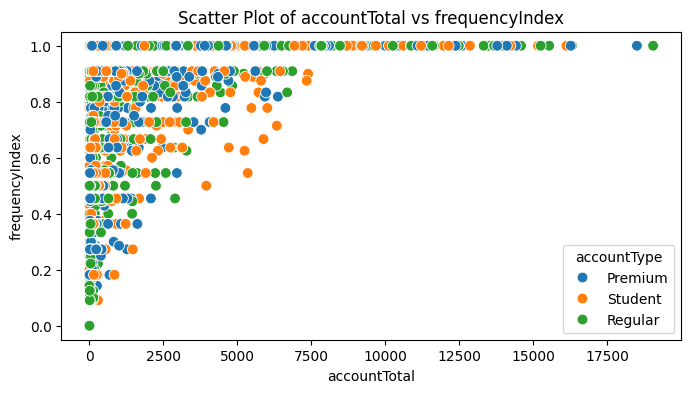

In [490]:
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=shopeasy_df,
    x='accountTotal',y='frequencyIndex',
    hue='accountType',s=60
)
plt.title('Scatter Plot of accountTotal vs frequencyIndex')
plt.show()

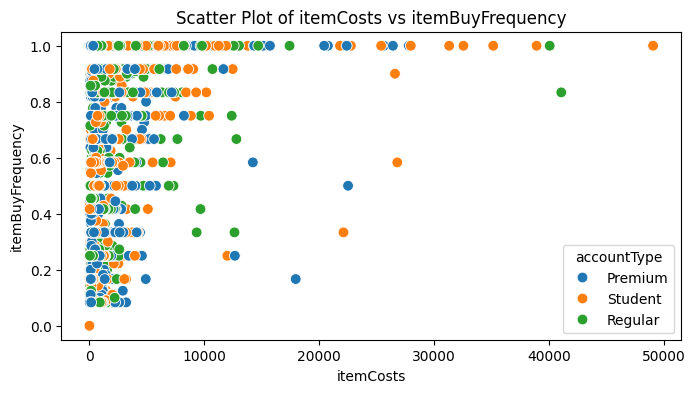

In [491]:
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=shopeasy_df,
    x='itemCosts',y='itemBuyFrequency',
    hue='accountType',s=60
)
plt.title('Scatter Plot of itemCosts vs itemBuyFrequency')
plt.show()

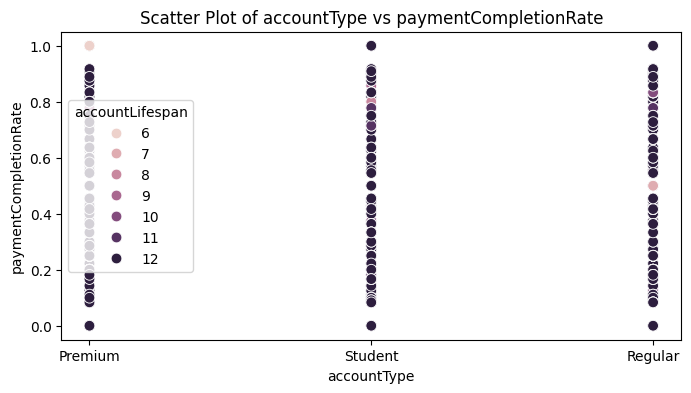

In [492]:
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=shopeasy_df,
    x='accountType',y='paymentCompletionRate',
    hue='accountLifespan',s=60
)
plt.title('Scatter Plot of accountType vs paymentCompletionRate')
plt.show()

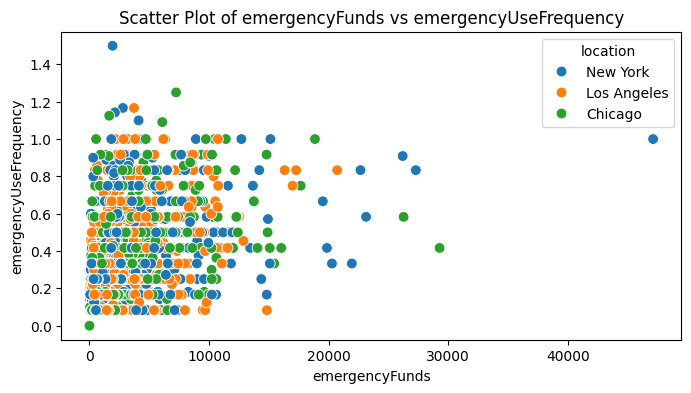

In [493]:
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=shopeasy_df,
    x='emergencyFunds',y='emergencyUseFrequency',
    hue='location',s=60
)
plt.title('Scatter Plot of emergencyFunds vs emergencyUseFrequency')   
plt.show()

In [494]:
numerical_df = shopeasy_df_scaled.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(14, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

High Correlations:
ItemBuyFrequency and MultipleItemBuyFrequency (0.86): This high correlation suggests that users who purchase frequently in general also tend to make installment-based purchases often. This insight could be used to personalize the shopping experience by offering installment options to frequent buyers.

EmergencyFunds and EmergencyCount (0.66): A significant correlation which indicates that users who maintain a larger emergency fund tend to use it more often. This could help in tailoring special promotions or services to users based on their emergency spending habits.

ItemCosts and SingleItemCosts (0.92): This strong correlation is to be expected since single-item purchases contribute to the total cost of items. This relationship is important for personalization by suggesting more single-purchase items to customers who tend to buy individual items.

EmergencyUseFrequency and EmergencyCount (0.80): This shows that users who frequently tap into their emergency funds do so multiple times. This pattern can be leveraged to offer personalized promotions for emergency fund top-ups or to suggest saving options within the platform.

# Analyzing High Correlations

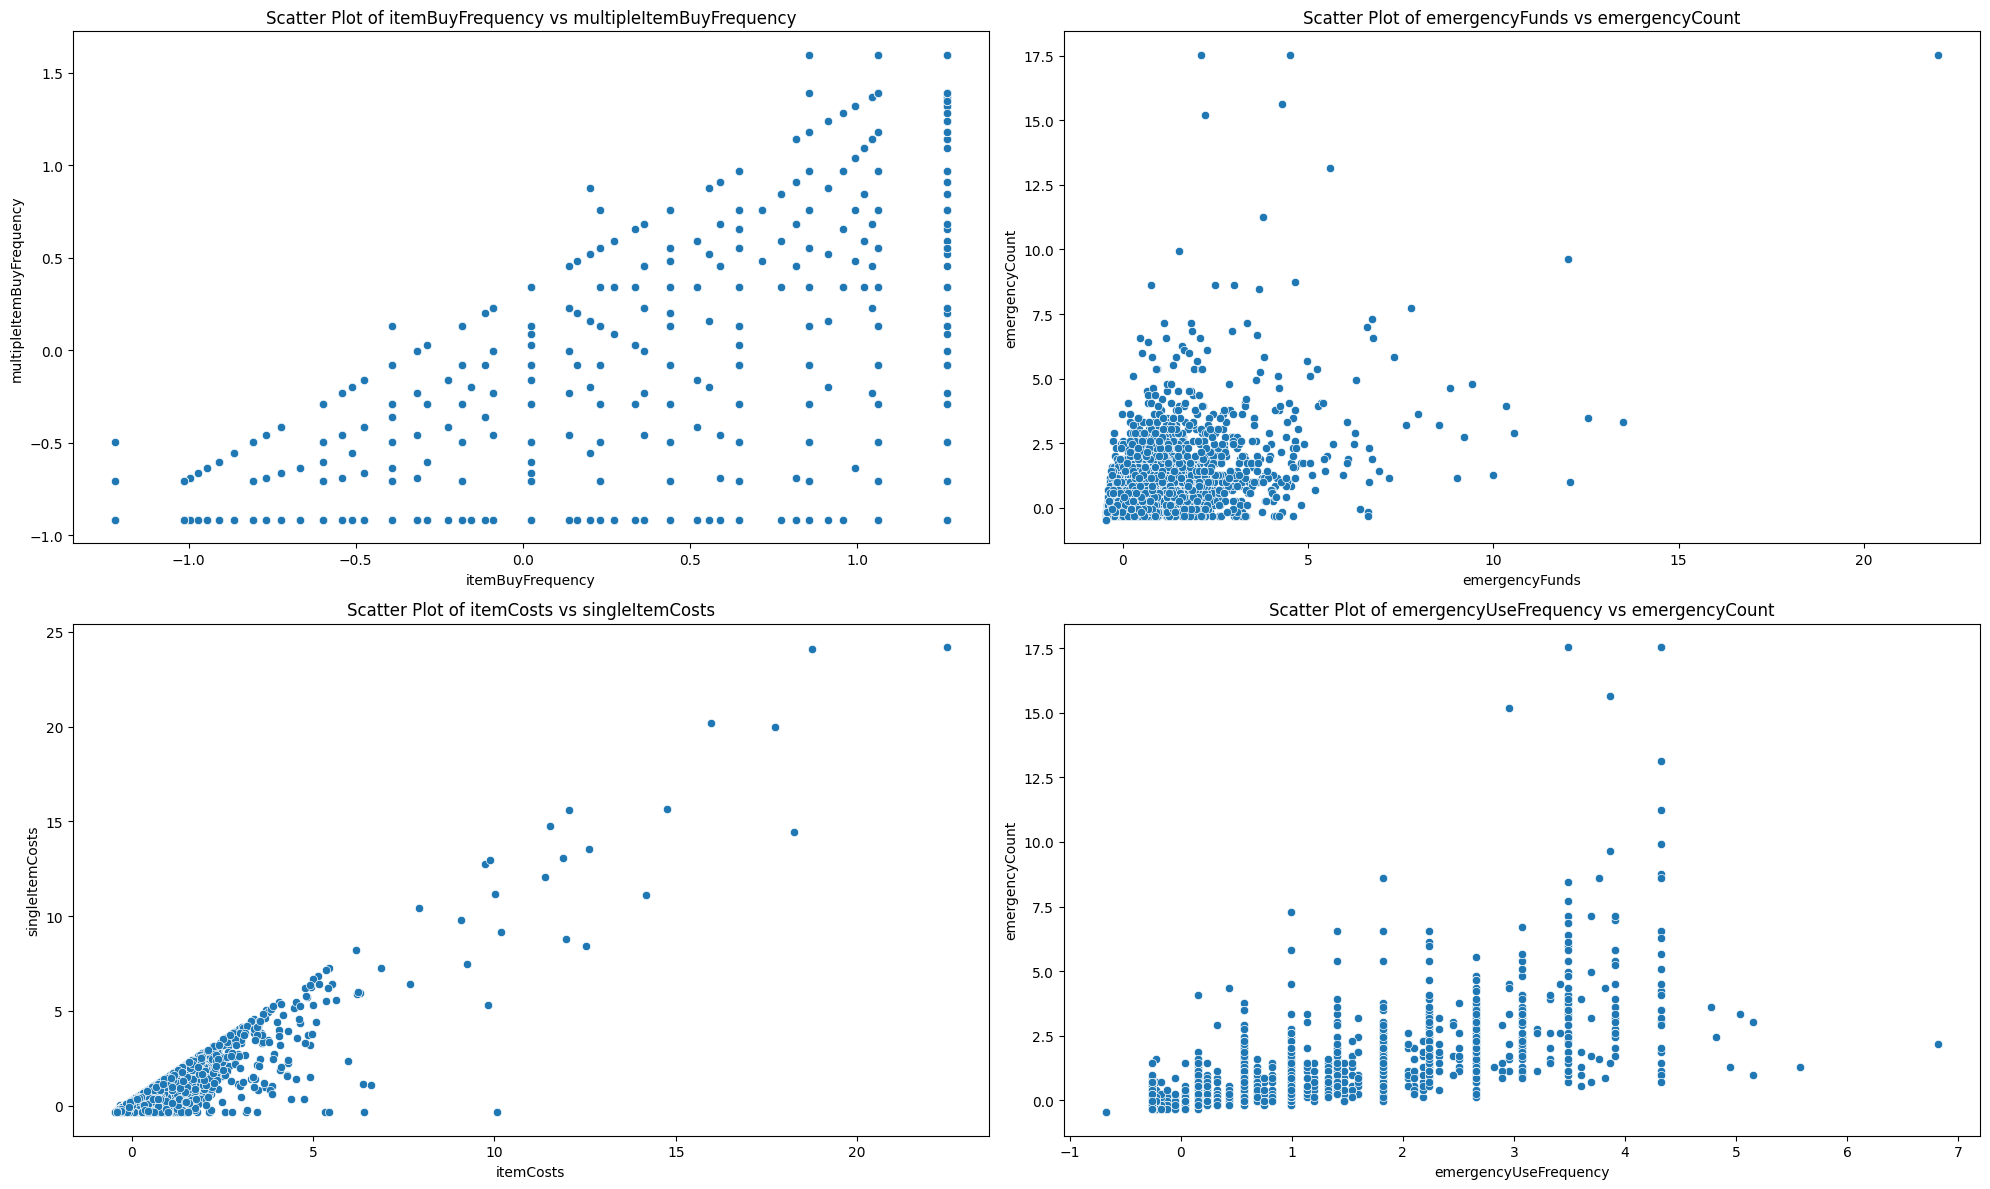

In [ ]:
# Sample pairs of features with high correlations
high_corr_pairs = [('itemBuyFrequency', 'multipleItemBuyFrequency'), ('emergencyFunds','emergencyCount'), ('itemCosts', 'singleItemCosts'), ('emergencyUseFrequency', 'emergencyCount')]

# Determine the number of rows/columns for the subplot grid
num_pairs = len(high_corr_pairs)
ncols = 2
nrows = num_pairs // ncols + (num_pairs % ncols > 0)  # Calculate the number of rows

# Creating subplots for scatter plots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 6*nrows))

axs = axs.reshape(nrows, ncols)

for i, pair in enumerate(high_corr_pairs):
    row = i // ncols
    col = i % ncols
    sns.scatterplot(data=shopeasy_df_scaled, x=pair[0], y=pair[1], ax=axs[row, col])
    axs[row, col].set_title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    axs[row, col].set_xlabel(pair[0])
    axs[row, col].set_ylabel(pair[1])

plt.tight_layout()
plt.show()

# Surprising Correlations


Surprising Correlations:
AccountTotal and EmergencyFunds (-0.50): It is surprising that users who have spent more overall tend to have less in emergency funds. This could indicate that high spenders are confident in their spending and less reliant on emergency funds, or perhaps they prefer other forms of payment security.

MaxSpendLimit and EmergencyFunds (-0.53): This is counterintuitive since one might expect that users allowed to spend more would also save more for emergencies. This finding could suggest that high-limit users are more likely to use credit options or other forms of payment rather than relying on emergency funds.

MonthlyPaid and AccountTotal (0.60): While the correlation is strong, it may be surprising that the total amount paid monthly is not even higher, given that total account spending could be assumed to be closely linked to the monthly payment amount.

PaymentCompletionRate and AccountTotal (-0.32): The negative correlation here is quite unexpected. One might assume that users who spend more overall would complete payments at a higher rate, but the data suggests that high spenders may not always pay off their purchases immediately, possibly due to installment plans or other spending behaviors.

These correlations can inform a deeper understanding of customer segments, which is crucial for creating personalized experiences. The high correlations point to areas where ShopEasy can predict and cater to customer preferences, while the surprising correlations highlight areas where conventional wisdom might not apply, offering opportunities for innovation in customer engagement strategies.

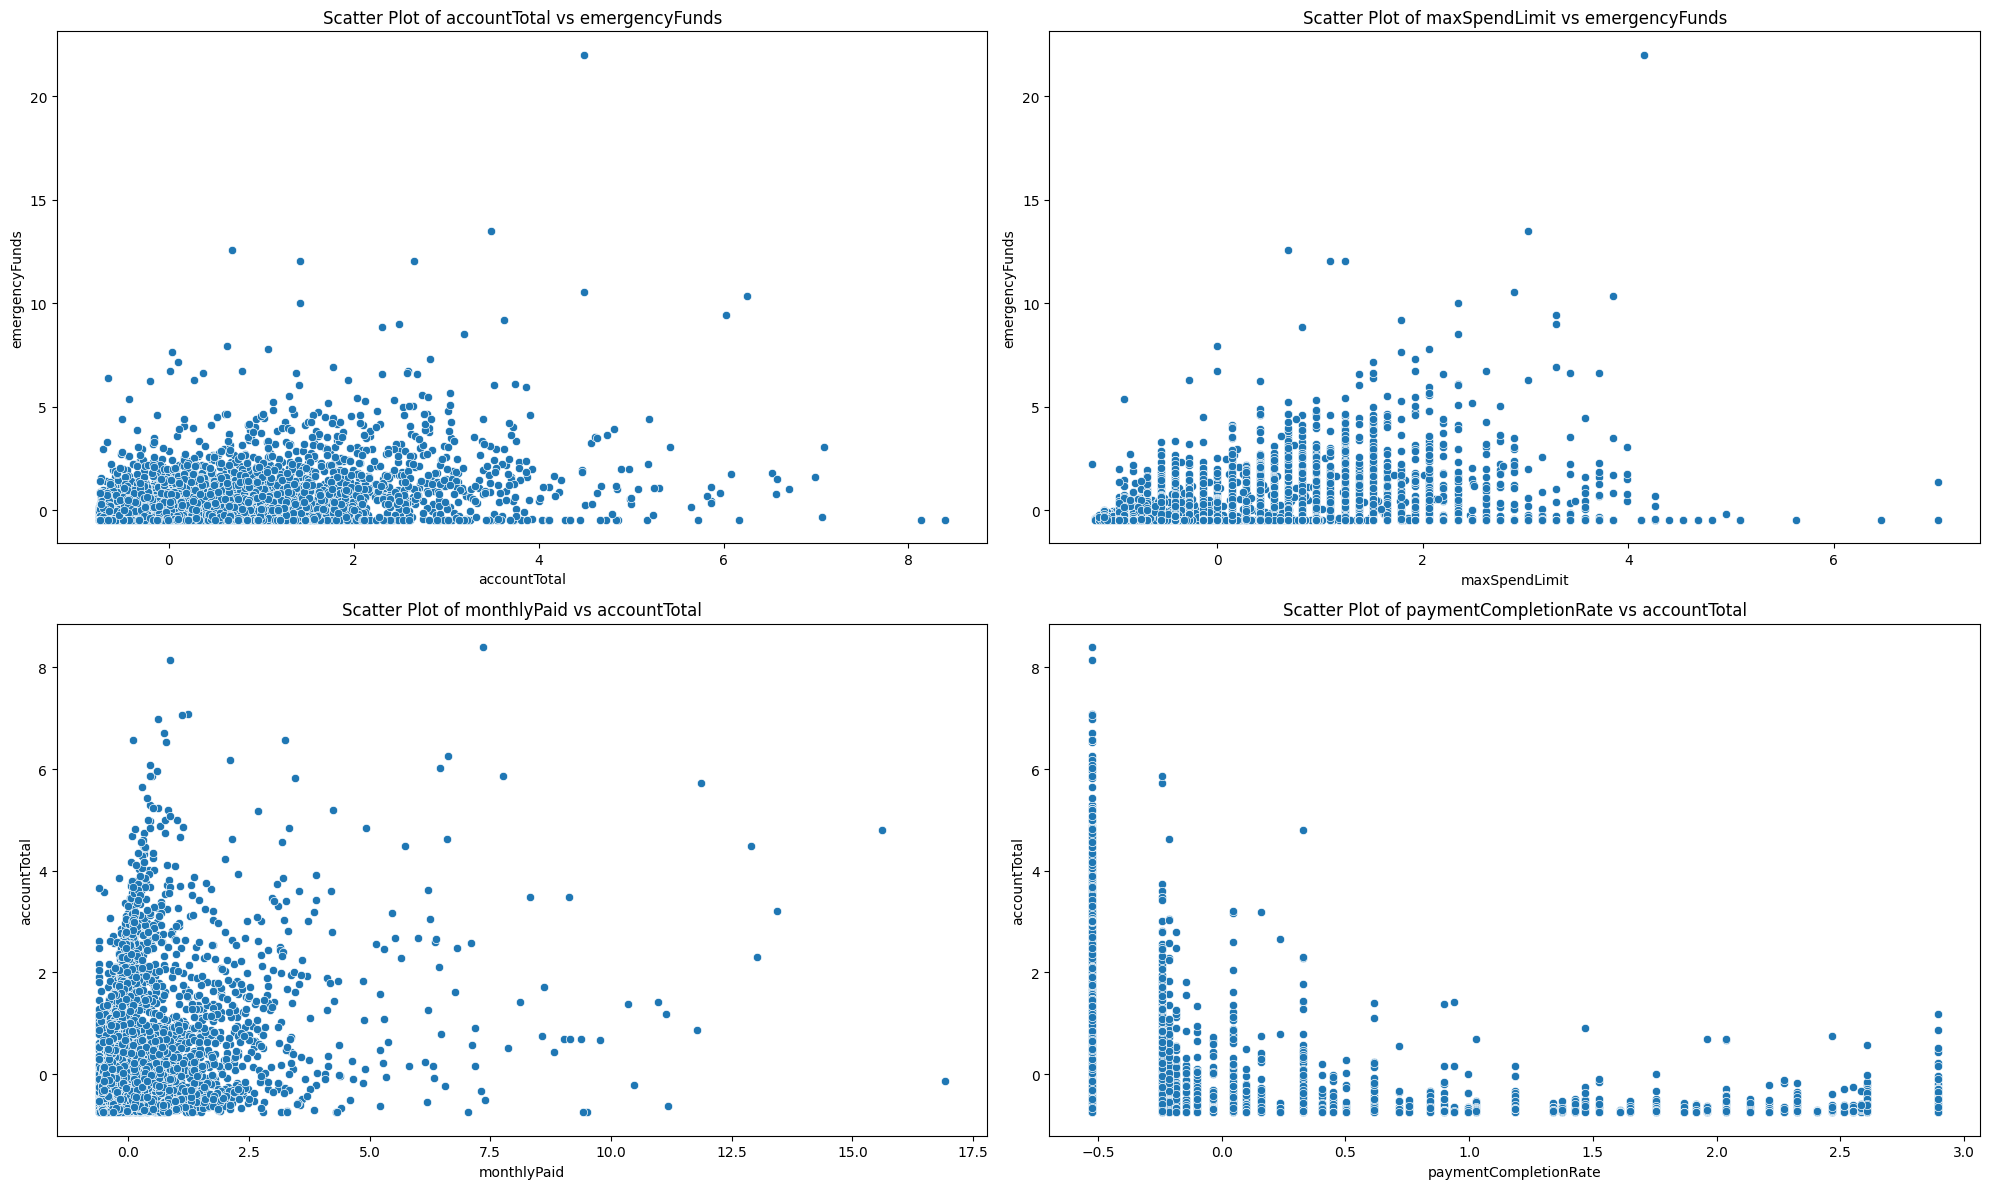

In [ ]:
# Sample pairs of features with surprising correlations
surprising_corr_pairs = [('accountTotal', 'emergencyFunds'), ('maxSpendLimit', 'emergencyFunds'),  ('monthlyPaid', 'accountTotal'), ('paymentCompletionRate', 'accountTotal')]

# Determine the number of rows/columns for the subplot grid
num_pairs = len(surprising_corr_pairs)
ncols = 2 

# Determine the number of rows/columns for the subplot grid
nrows = num_pairs // ncols + (num_pairs % ncols > 0)

# Creating subplots for scatter plots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 6*nrows))
axs = axs.reshape(nrows, ncols)

for i, pair in enumerate(surprising_corr_pairs):
    row = i // ncols
    col = i % ncols
    sns.scatterplot(data=shopeasy_df_scaled, x=pair[0], y=pair[1], ax=axs[row, col])
    axs[row, col].set_title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    axs[row, col].set_xlabel(pair[0])
    axs[row, col].set_ylabel(pair[1])

plt.tight_layout()
plt.show()

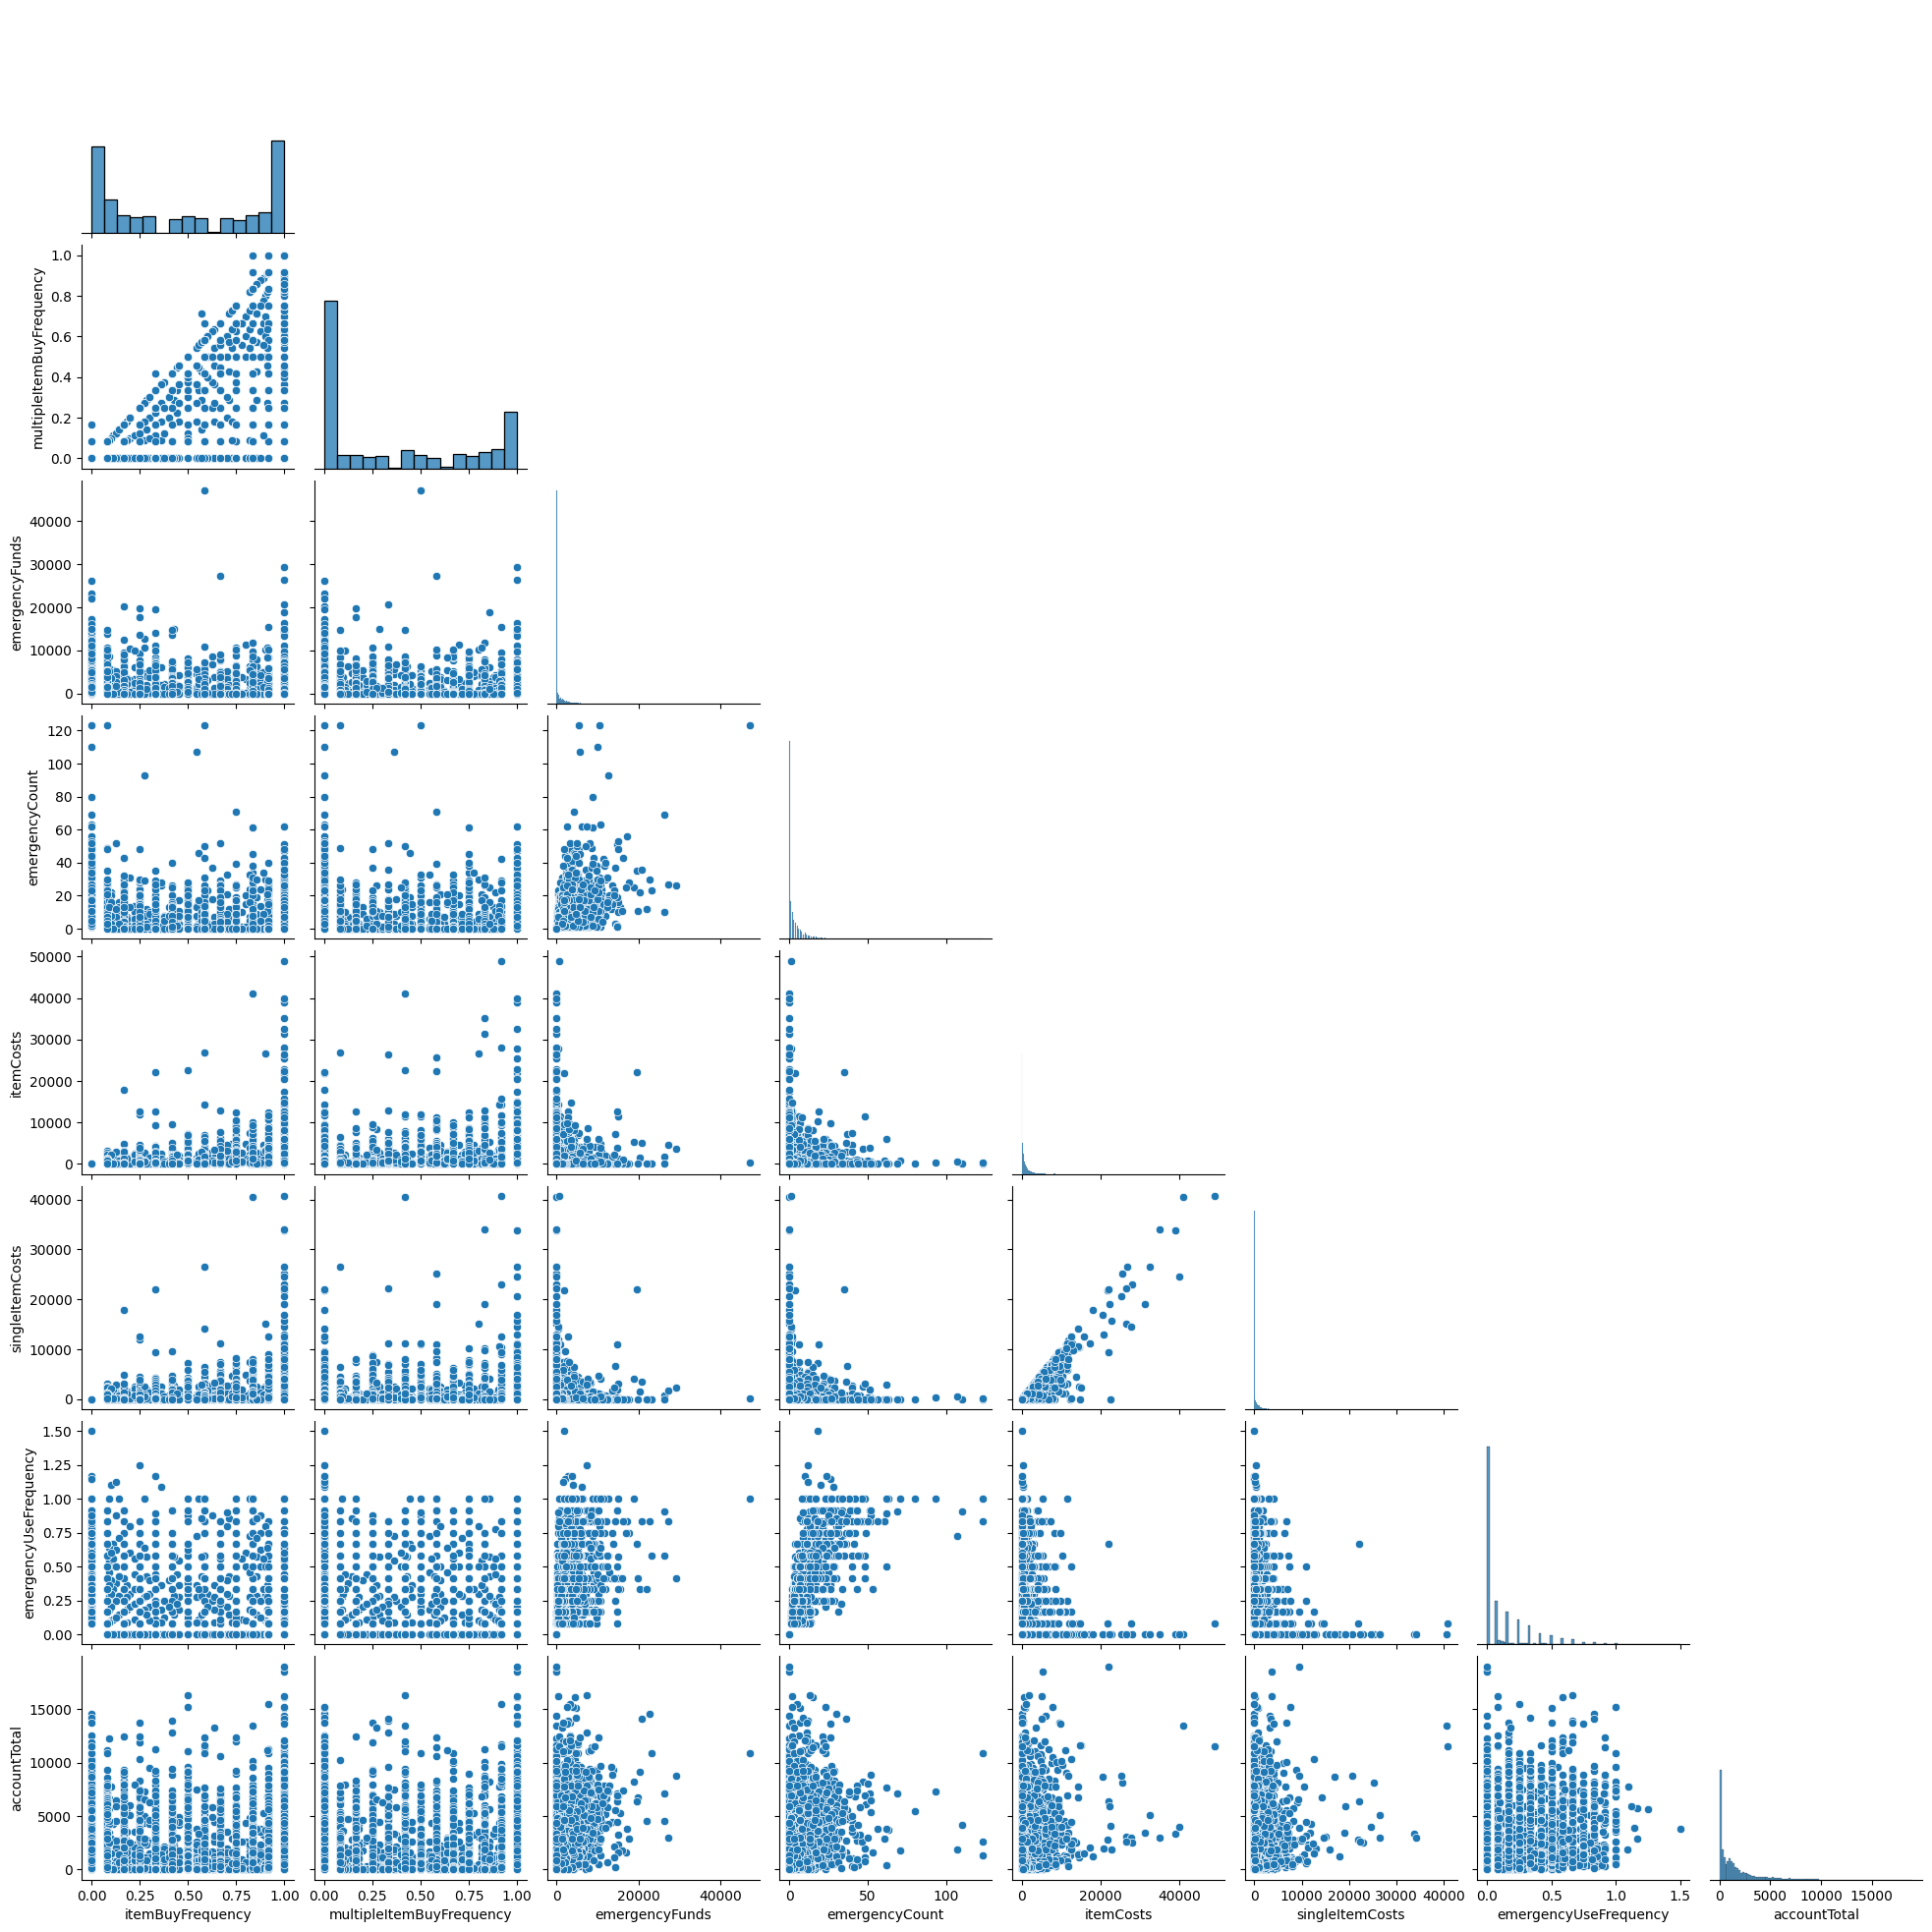

In [ ]:
selected_features = [
    'itemBuyFrequency', 'multipleItemBuyFrequency', 'emergencyFunds',
    'emergencyCount', 'itemCosts', 'singleItemCosts', 'emergencyUseFrequency',
    'accountTotal'
]

# Creating the pairplot
sns.pairplot(shopeasy_df_encoded[selected_features], corner=True)
plt.show()

In [ ]:
range_of_clusters = range(1, 11)

inertia_values = []

for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(range_of_clusters, inertia_values, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range_of_clusters)
plt.show()

NameError: name 'X' is not defined

Silhouette Score: 0.1463084850679968


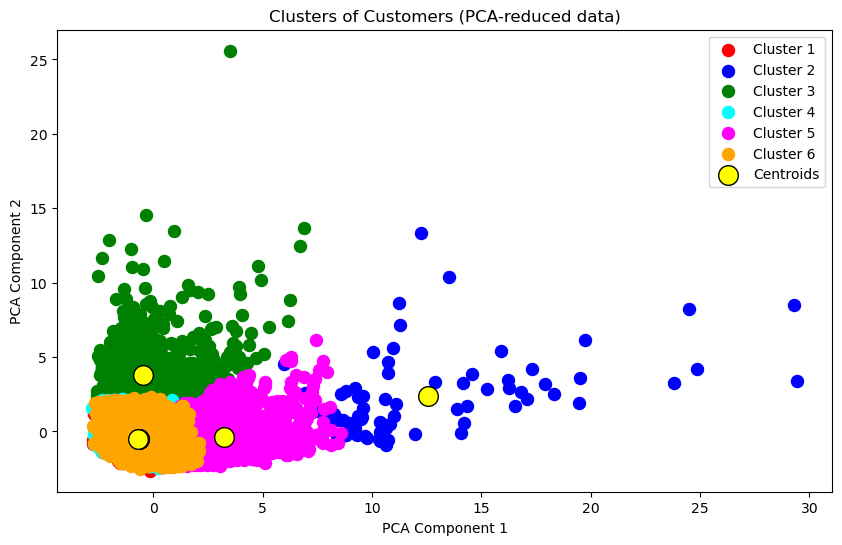

In [ ]:
selected_features = [
    "accountTotal",
    "frequencyIndex",
    "itemCosts",
    "singleItemCosts",
    "multipleItemCosts",
    "emergencyFunds",
    "itemBuyFrequency",
    "singleItemBuyFrequency",
    "multipleItemBuyFrequency",
    "emergencyUseFrequency",
    "emergencyCount",
    "itemCount",
    "maxSpendLimit",
    "monthlyPaid",
    "leastAmountPaid",
    "paymentCompletionRate",
    "accountLifespan",
    "location_Chicago",
    "location_New York",
    "location_Los Angeles",
    "accountType_encoded",
    "webUsage"
]
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(shopeasy_df_scaled[selected_features])

# Performing KMeans clustering with 5 clusters
clusters = 6
kmeans = KMeans(n_clusters=clusters, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X_scaled)

# Calculating the silhouette score
silhouette_avg = ss(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

y_kmeans = kmeans.labels_

# Reducing the data to two dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'orange']  # Colors for 5 clusters
for i in range(clusters):
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], s=75, c=colors[i], label=f"Cluster {i+1}")

# Plotting the centroids
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=200,
    c="yellow",
    label="Centroids",
    edgecolor='black'
)

plt.title("Clusters of Customers (PCA-reduced data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

Best parameters: {'eps': 1.9000000000000001, 'min_samples': 7}
Best silhouette score (ignoring noise): 0.04553929689712186


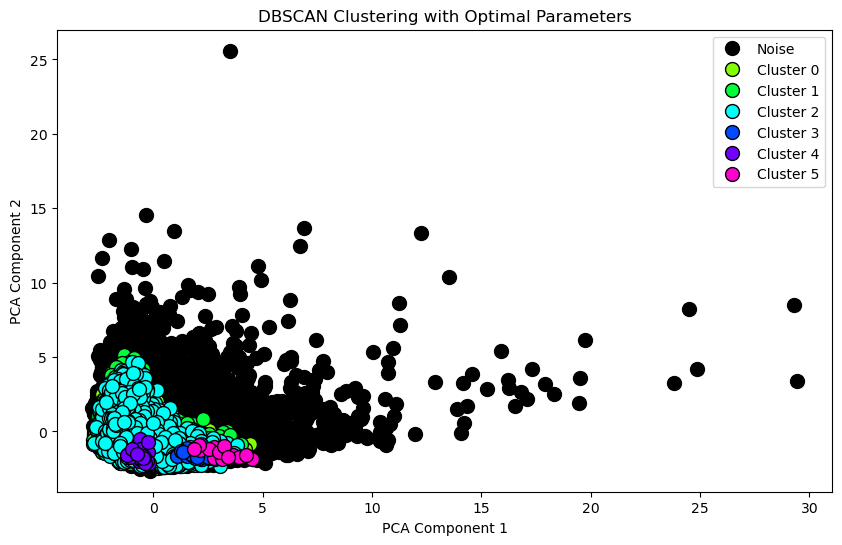

In [ ]:
selected_features = [
    # All relevant features, including encoded categorical features
    "accountTotal", "frequencyIndex", "itemCosts", "singleItemCosts",
    "multipleItemCosts", "emergencyFunds", "itemBuyFrequency",
    "singleItemBuyFrequency", "multipleItemBuyFrequency", "emergencyUseFrequency",
    "emergencyCount", "itemCount", "maxSpendLimit", "monthlyPaid",
    "leastAmountPaid", "paymentCompletionRate", "accountLifespan",
    "location_Chicago", "location_New York", "location_Los Angeles",
    "accountType_encoded", "webUsage"
]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(shopeasy_df_scaled[selected_features])

# Define a function to compute the average silhouette score for non-noise points
def silhouette_score_non_noise(X, labels):
    # Filter out noise points
    non_noise_mask = (labels != -1)
    if np.sum(non_noise_mask) > 1:  # At least 2 points to compute silhouette score
        return ss(X[non_noise_mask], labels[non_noise_mask])
    else:
        return -1  # Silhouette score is not defined for less than 2 points

# Grid search (manual) for DBSCAN parameters
eps_values = np.arange(0.1, 2.0, 0.1)  # Wider range may be necessary
min_samples_values = range(2, 11)
best_score = -1
best_params = {'eps': None, 'min_samples': None}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        # Skip silhouette score calculation if only one cluster (or none) is found
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters_ > 1:
            score = ss(X_scaled, labels)
            if score > best_score:
                best_score = score
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples

print(f"Best parameters: {best_params}")
print(f"Best silhouette score (ignoring noise): {best_score}")
# Apply DBSCAN with the best parameters found
dbscan_optimal = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
labels_optimal = dbscan_optimal.fit_predict(X_scaled)

# Reduce dimensions for visualization with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 6))
unique_labels = np.unique(labels_optimal)
colors = sns.color_palette('hsv', n_colors=len(unique_labels))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
    
    class_member_mask = (labels_optimal == k)
    plt.plot(X_pca[class_member_mask, 0], X_pca[class_member_mask, 1], 'o', 
             markerfacecolor=col, markeredgecolor='k', markersize=10, 
             label='Noise' if k == -1 else f'Cluster {k}')

plt.title('DBSCAN Clustering with Optimal Parameters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Dimension reduction with PCA

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()
pca.fit(shopeasy_df_scaled)

# Print explained variances
print(pca.explained_variance_ratio_)

[5.71180539e+00 3.63405943e+00 1.53719615e+00 1.20437143e+00
 1.07174724e+00 1.00356049e+00 9.19360927e-01 7.20438444e-01
 6.63340296e-01 5.55813109e-01 5.09869061e-01 3.34323892e-01
 3.33183540e-01 3.07570516e-01 2.46895553e-01 1.78570936e-01
 1.74280696e-01 1.02897167e-01 6.62005309e-02 4.93719714e-02
 9.26265290e-03 7.09620548e-32]
[2.95426198e-01 1.87960949e-01 7.95069127e-02 6.22925410e-02
 5.54329483e-02 5.19061907e-02 4.75512180e-02 3.72625424e-02
 3.43093100e-02 2.87477850e-02 2.63714654e-02 1.72919120e-02
 1.72329307e-02 1.59081730e-02 1.27699404e-02 9.23605221e-03
 9.01415225e-03 5.32205086e-03 3.42402617e-03 2.55361883e-03
 4.79083257e-04 3.67030188e-33]


In [ ]:
# Print cumulative explained variances
cum_sum = np.cumsum(pca.explained_variance_ratio_)
dimentions = list(range(1, len(cum_sum)+1))

print(cum_sum)

[0.2954262  0.48338715 0.56289406 0.6251866  0.68061955 0.73252574
 0.78007696 0.8173395  0.85164881 0.88039659 0.90676806 0.92405997
 0.9412929  0.95720108 0.96997102 0.97920707 0.98822122 0.99354327
 0.9969673  0.99952092 1.         1.        ]


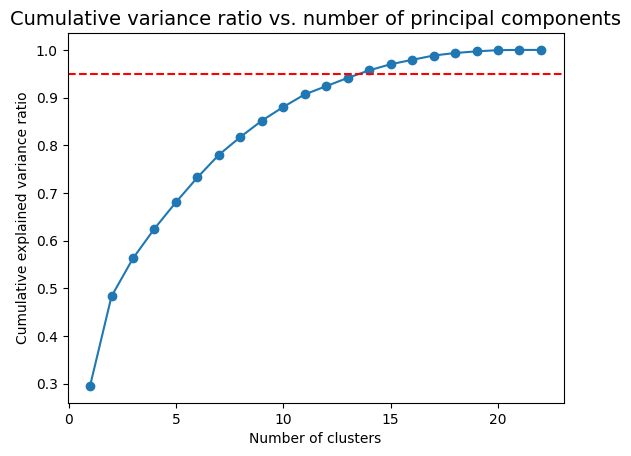

In [ ]:
keep_ratio = .95

# Plot cumulative explained variance ratio
fig, ax = plt.subplots()
ax.plot(dimentions, cum_sum)
ax.axhline(y=keep_ratio, color="red", linestyle="--")
ax.scatter(dimentions, cum_sum)
ax.set_title('Cumulative variance ratio vs. number of principal components', fontsize=14)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Cumulative explained variance ratio')
plt.show()

In [ ]:
# Reduce dimensions keeping keep_ratio cumulative variance
pca = PCA(n_components=keep_ratio)
shopeasy_reduced = pca.fit_transform(shopeasy_df_scaled)

print(f"shopeasy_reduced shape: {shopeasy_reduced.shape}")

reduced_column_names = list(range(1, shopeasy_reduced.shape[1]+1))

type(shopeasy_reduced)

shopeasy_reduced shape: (8949, 14)


numpy.ndarray

# Clustering - Kmean

## Find optimal number of clusters

### Explore via inertia evaluation

c:\Users\chiar\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\chiar\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\Users\chiar\AppData\Local\Temp\ipykernel_18680\2737416761.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


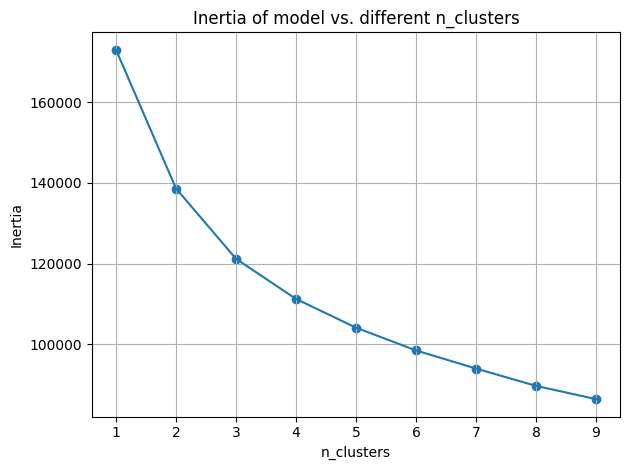

In [ ]:
n_clusters_vector = [i for i in range(1,10)]
inertia_vector = []


for n_clusters in n_clusters_vector:
  clustering_method = KMeans(n_clusters = n_clusters, init = 'k-means++', n_init=10, random_state=42)
  clustering_method.fit(shopeasy_df_scaled)
  inertia_vector.append(clustering_method.inertia_)

fig, ax = plt.subplots()
ax.plot(n_clusters_vector, inertia_vector)
ax.scatter(n_clusters_vector, inertia_vector)
ax.set_title('Inertia of model vs. different n_clusters')
ax.set_xlabel('n_clusters')
ax.set_ylabel('Inertia')
ax.grid()
fig.tight_layout()
fig.show()

### Explore via silhouetting

[8 8 3 ... 4 3 3]


C:\Users\chiar\AppData\Local\Temp\ipykernel_18680\557003372.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


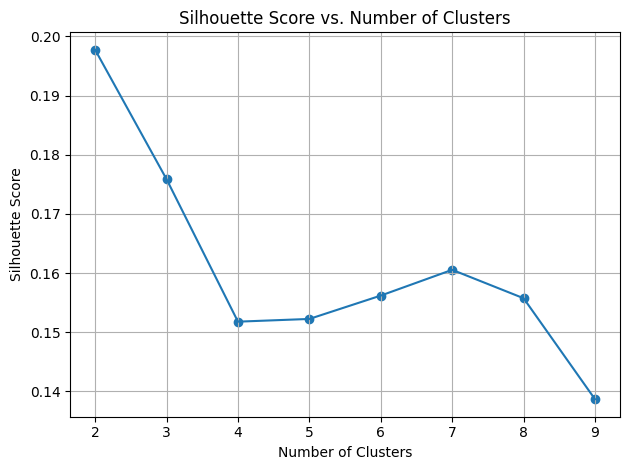

In [ ]:
n_clusters_vector = [i for i in range(2, 10)]  # Silhouette score is not defined for 1 cluster
silhouette_scores = []

for n_clusters in n_clusters_vector:
    clustering_method = KMeans(n_clusters=n_clusters, init='random', n_init='auto', random_state=42)
    cluster_labels = clustering_method.fit_predict(shopeasy_reduced)
    score = ss(shopeasy_reduced, cluster_labels)
    silhouette_scores.append(score)

# Plot silhouette
fig, ax = plt.subplots()
ax.plot(n_clusters_vector, silhouette_scores)
ax.scatter(n_clusters_vector, silhouette_scores)
ax.set_title('Silhouette Score vs. Number of Clusters')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')
ax.grid()
fig.tight_layout()
fig.show()

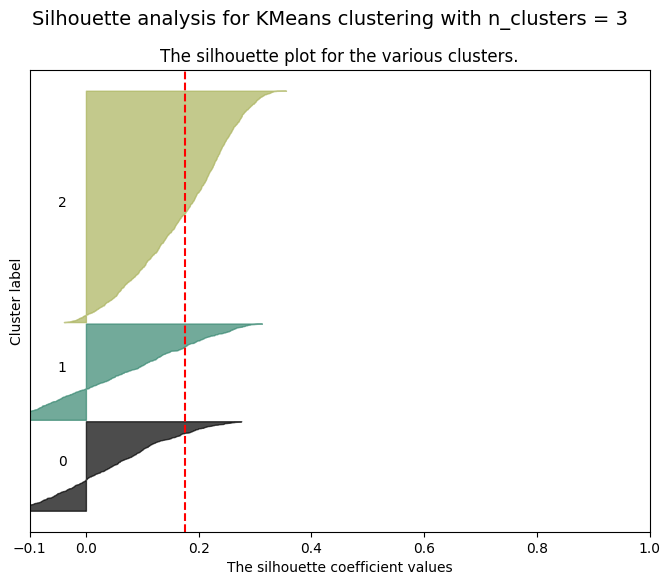

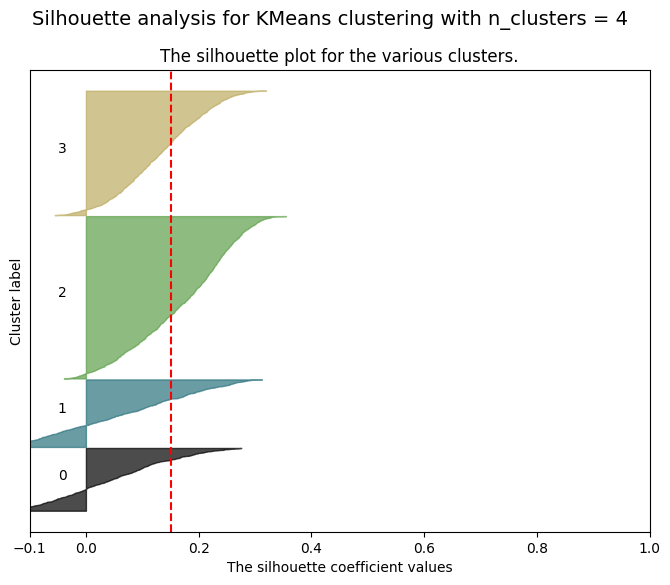

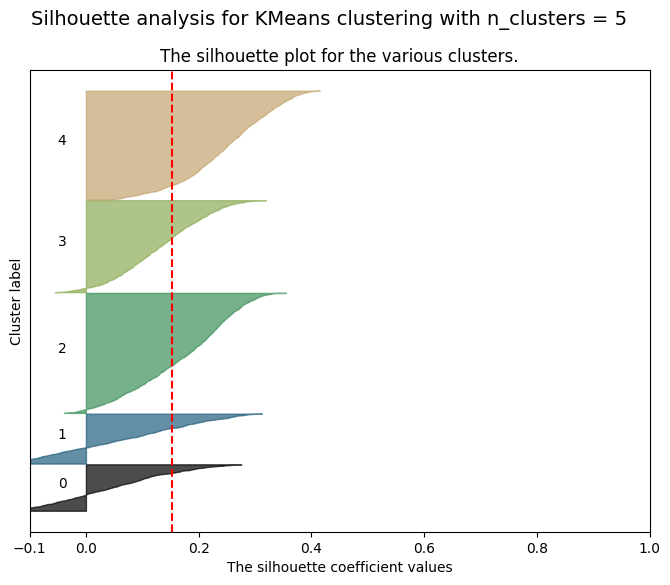

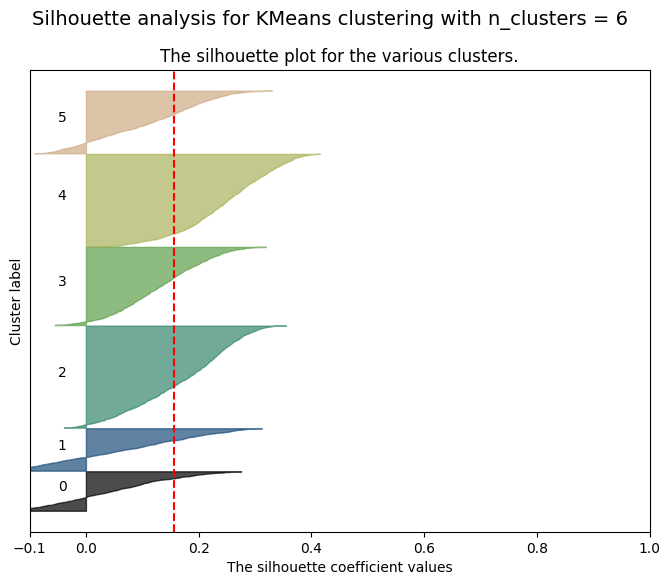

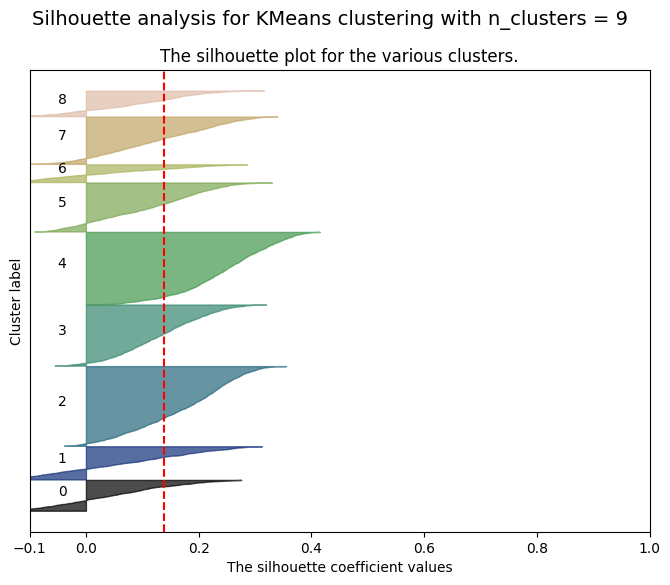

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

idx_of_interesting_clusters = [
    n_clusters_vector.index(3), 
    n_clusters_vector.index(4), 
    n_clusters_vector.index(5), 
    n_clusters_vector.index(6),  
    n_clusters_vector.index(9), 
]

for i in idx_of_interesting_clusters:
    # data relative to interesting cluster already calculated
    n_clusters =n_clusters_vector[i]
    cluster_labels = clustering_method.fit_predict(shopeasy_reduced)
    avg_silhouette = silhouette_scores[i]

    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))

    # The silhouette coefficient can range from -1, 1 but in this case all lie within [-.1, .4]
    ax1.set_xlim([-.1, .4])


    # Compute the silhouette scores for each sample
    cluster_labels = clustering_method.fit_predict(shopeasy_reduced)
    sample_silhouette_values = silhouette_samples(shopeasy_reduced, cluster_labels)

    y_lower = 10
    for j in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster j, and sort them
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        jth_cluster_silhouette_values.sort()

        size_cluster_j = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = cm.gist_earth(float(j) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            jth_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=avg_silhouette, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        f"Silhouette analysis for KMeans clustering with n_clusters = {n_clusters}",
        fontsize=14,
    )

plt.show()

The four clusters configuration has the lowest silhouette score.

In addition, its silhouette profile shows its four cluster have a similar number of elements.

Therefore clustering will proceed useng four clusters.

## KMeans Clustering

In [ ]:
n_clusters = 4

# Fit KMeans to the dataset
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', n_init=10, random_state=42) 
y_kmeans = kmeans.fit_predict(shopeasy_reduced)

y_kmeans

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
# Count rows in each cluster
print("Number of points per cluster (KMeans)")
pd.Series(y_kmeans).value_counts()

Number of points per cluster (KMeans)


2    3173
1    2626
3    1581
0    1569
Name: count, dtype: int64

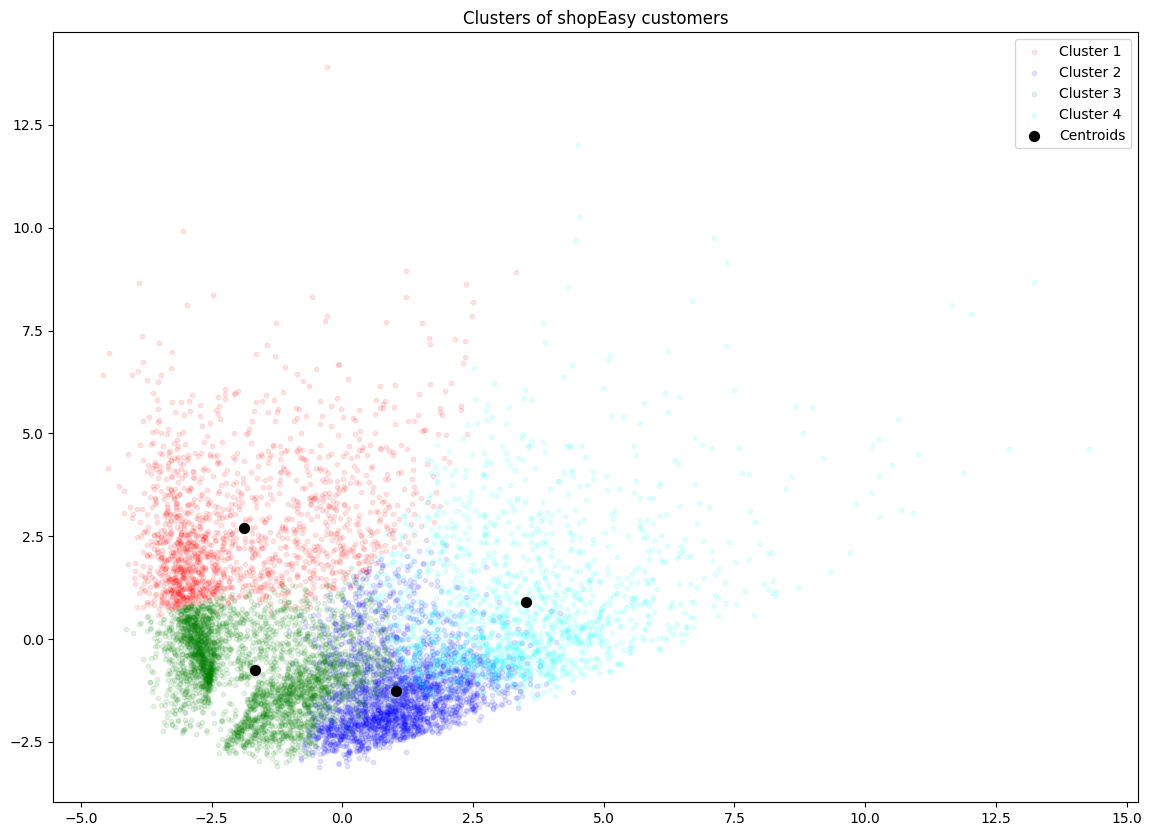

In [ ]:
# Visualise the clusters along the two most significant features

point_size = 10
alpha = 0.1
plt.figure(figsize=(14, 10))
plt.scatter(shopeasy_reduced[y_kmeans == 0, 0], shopeasy_reduced[y_kmeans == 0, 1], s = point_size, c = 'red', label = 'Cluster 1', alpha=alpha)
plt.scatter(shopeasy_reduced[y_kmeans == 1, 0], shopeasy_reduced[y_kmeans == 1, 1], s = point_size, c = 'blue', label = 'Cluster 2', alpha=alpha)
plt.scatter(shopeasy_reduced[y_kmeans == 2, 0], shopeasy_reduced[y_kmeans == 2, 1], s = point_size, c = 'green', label = 'Cluster 3', alpha=alpha)
plt.scatter(shopeasy_reduced[y_kmeans == 3, 0], shopeasy_reduced[y_kmeans == 3, 1], s = point_size, c = 'cyan', label = 'Cluster 4', alpha=alpha)
#plt.scatter(shopeasy_reduced[y_kmeans == 4, 0], shopeasy_reduced[y_kmeans == 4, 1], s = point_size, c = 'magenta', label = 'Cluster 5', alpha=alpha)
#plt.scatter(shopeasy_reduced[y_kmeans == 5, 0], shopeasy_reduced[y_kmeans == 5, 1], s = point_size, c = 'grey', label = 'Cluster 6', alpha=alpha)
#plt.scatter(shopeasy_reduced[y_kmeans == 6, 0], shopeasy_reduced[y_kmeans == 6, 1], s = point_size, c = 'orange', label = 'Cluster 7', alpha=alpha)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 5*point_size, c = 'black', label = 'Centroids')
plt.title('Clusters of shopEasy customers')
plt.legend()
plt.show()

# Clustering - Hierarchical Clustering

## Find optimal number of clusters

In [ ]:
# Calculate linkage matrix encoding (defaults to single and euclidean distance)
linkage_matrix = sch.linkage(shopeasy_reduced, method = 'ward')

# Ward's method: distance between two clusters A and B is how much the sum of squares will increase when we merge them
# single for min distance
# complete for max distance
# average for centroid distance

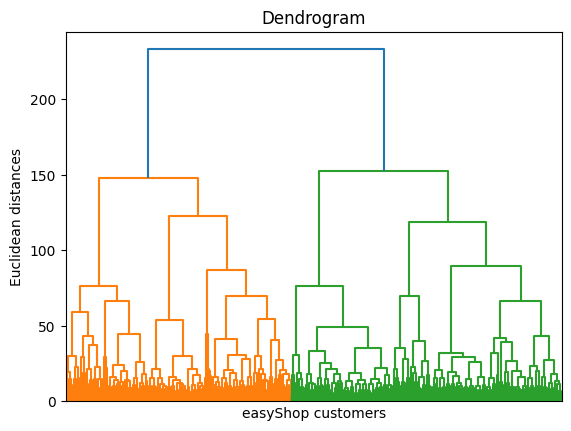

In [ ]:
# Plot the dendrogram
dendrogram = sch.dendrogram(linkage_matrix, no_labels=True)
plt.title('Dendrogram')
plt.xlabel('easyShop customers')
plt.ylabel('Euclidean distances')
plt.show()

From visual inspection of the dendrogram plot it appears that the customer data may be organised around four clusters.

This confirms the KMeans findings.

In [ ]:
n_clusters = 4

# Fitting Hierarchical Clustering to the dataset
hc = AgglomerativeClustering(n_clusters = n_clusters, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(shopeasy_reduced)

In [ ]:
# Count rows in each cluster
print("Number of points per cluster (Hierarchical Clustering)")
pd.Series(y_hc).value_counts()

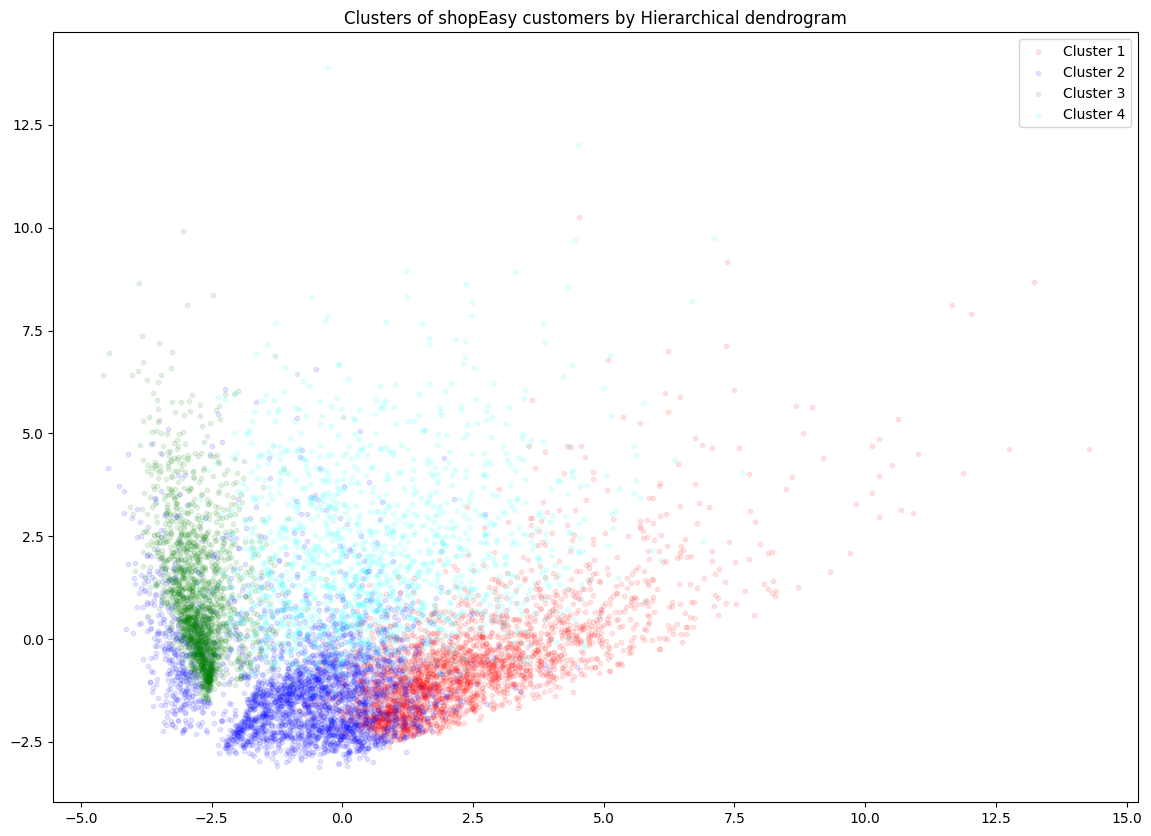

In [ ]:
# Visualise the clusters
point_size = 10
alpha=.1

plt.figure(figsize=(14, 10))
plt.scatter(shopeasy_reduced[y_hc == 0, 0], shopeasy_reduced[y_hc == 0, 1], s = point_size, c = 'red', label = 'Cluster 1', alpha=alpha)
plt.scatter(shopeasy_reduced[y_hc == 1, 0], shopeasy_reduced[y_hc == 1, 1], s = point_size, c = 'blue', label = 'Cluster 2', alpha=alpha)
plt.scatter(shopeasy_reduced[y_hc == 2, 0], shopeasy_reduced[y_hc == 2, 1], s = point_size, c = 'green', label = 'Cluster 3', alpha=alpha)
plt.scatter(shopeasy_reduced[y_hc == 3, 0], shopeasy_reduced[y_hc == 3, 1], s = point_size, c = 'cyan', label = 'Cluster 4', alpha=alpha)
#plt.scatter(shopeasy_reduced[y_hc == 4, 0], shopeasy_reduced[y_hc == 4, 1], s = point_size, c = 'magenta', label = 'Cluster 5', alpha=alpha)
#plt.scatter(shopeasy_reduced[y_hc == 5, 0], shopeasy_reduced[y_hc == 5, 1], s = point_size, c = 'grey', label = 'Cluster 6', alpha=alpha)
#plt.scatter(shopeasy_reduced[y_hc == 6, 0], shopeasy_reduced[y_hc == 6, 1], s = point_size, c = 'orange', label = 'Cluster 7', alpha=alpha)
plt.title('Clusters of shopEasy customers by Hierarchical dendrogram')
plt.legend()
plt.show()

# Properties of customer clusters

In [499]:
def plot_clusters_sizes(cluster_labels, title):
    # Create a new dataframe with the cluster labels
    shopeasy_labeled = shopeasy_df_encoded.copy()
    shopeasy_labeled['cluster_label'] = cluster_labels
    
    # Plot cluster sizes
    plt.figure(figsize=(6, 4))
    sns.countplot(x='cluster_label', data=shopeasy_labeled)
    plt.title(title)
    plt.xlabel('Cluster Label')
    plt.ylabel('Count')
    plt.show()

    # Print the counts of each cluster
    print(shopeasy_labeled['cluster_label'].value_counts())


def plot_clusters_distribution(cluster_labels, title):
    # Create a new dataframe with the cluster labels
    shopeasy_labeled = shopeasy_df_encoded.copy()
    shopeasy_labeled['cluster_label'] = cluster_labels

    # Plot clusters distribution
    num_colors = len(shopeasy_labeled["cluster_label"].unique())
    palette = sns.color_palette("Set2")[:num_colors]
    bins = 11

    num_columns_per_row = 6
    num_rows = (num_all_columns // num_columns_per_row) + (num_all_columns % num_columns_per_row)

    plt.figure(figsize=(4 * num_columns_per_row, 4 * num_rows)) 

    for i, column in enumerate(all_columns, 1):
        plt.subplot(num_rows, num_columns_per_row, i)
        sns.histplot(data=shopeasy_labeled, x=column, hue="cluster_label", multiple="stack", bins=bins, palette=palette)
        plt.title(f'{column}')

    plt.suptitle(title, fontsize=14, y=1.01)
    plt.tight_layout()
    plt.show()

## Kmeans Clustering

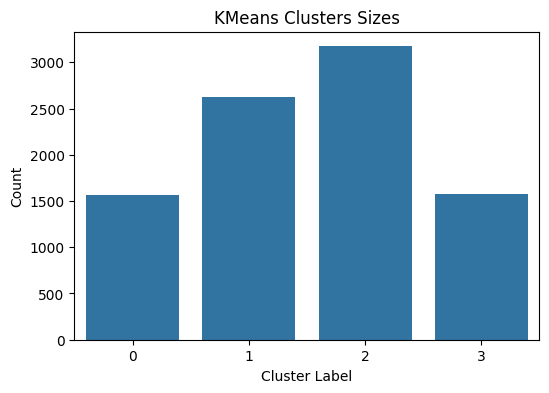

cluster_label
2    3173
1    2626
3    1581
0    1569
Name: count, dtype: int64


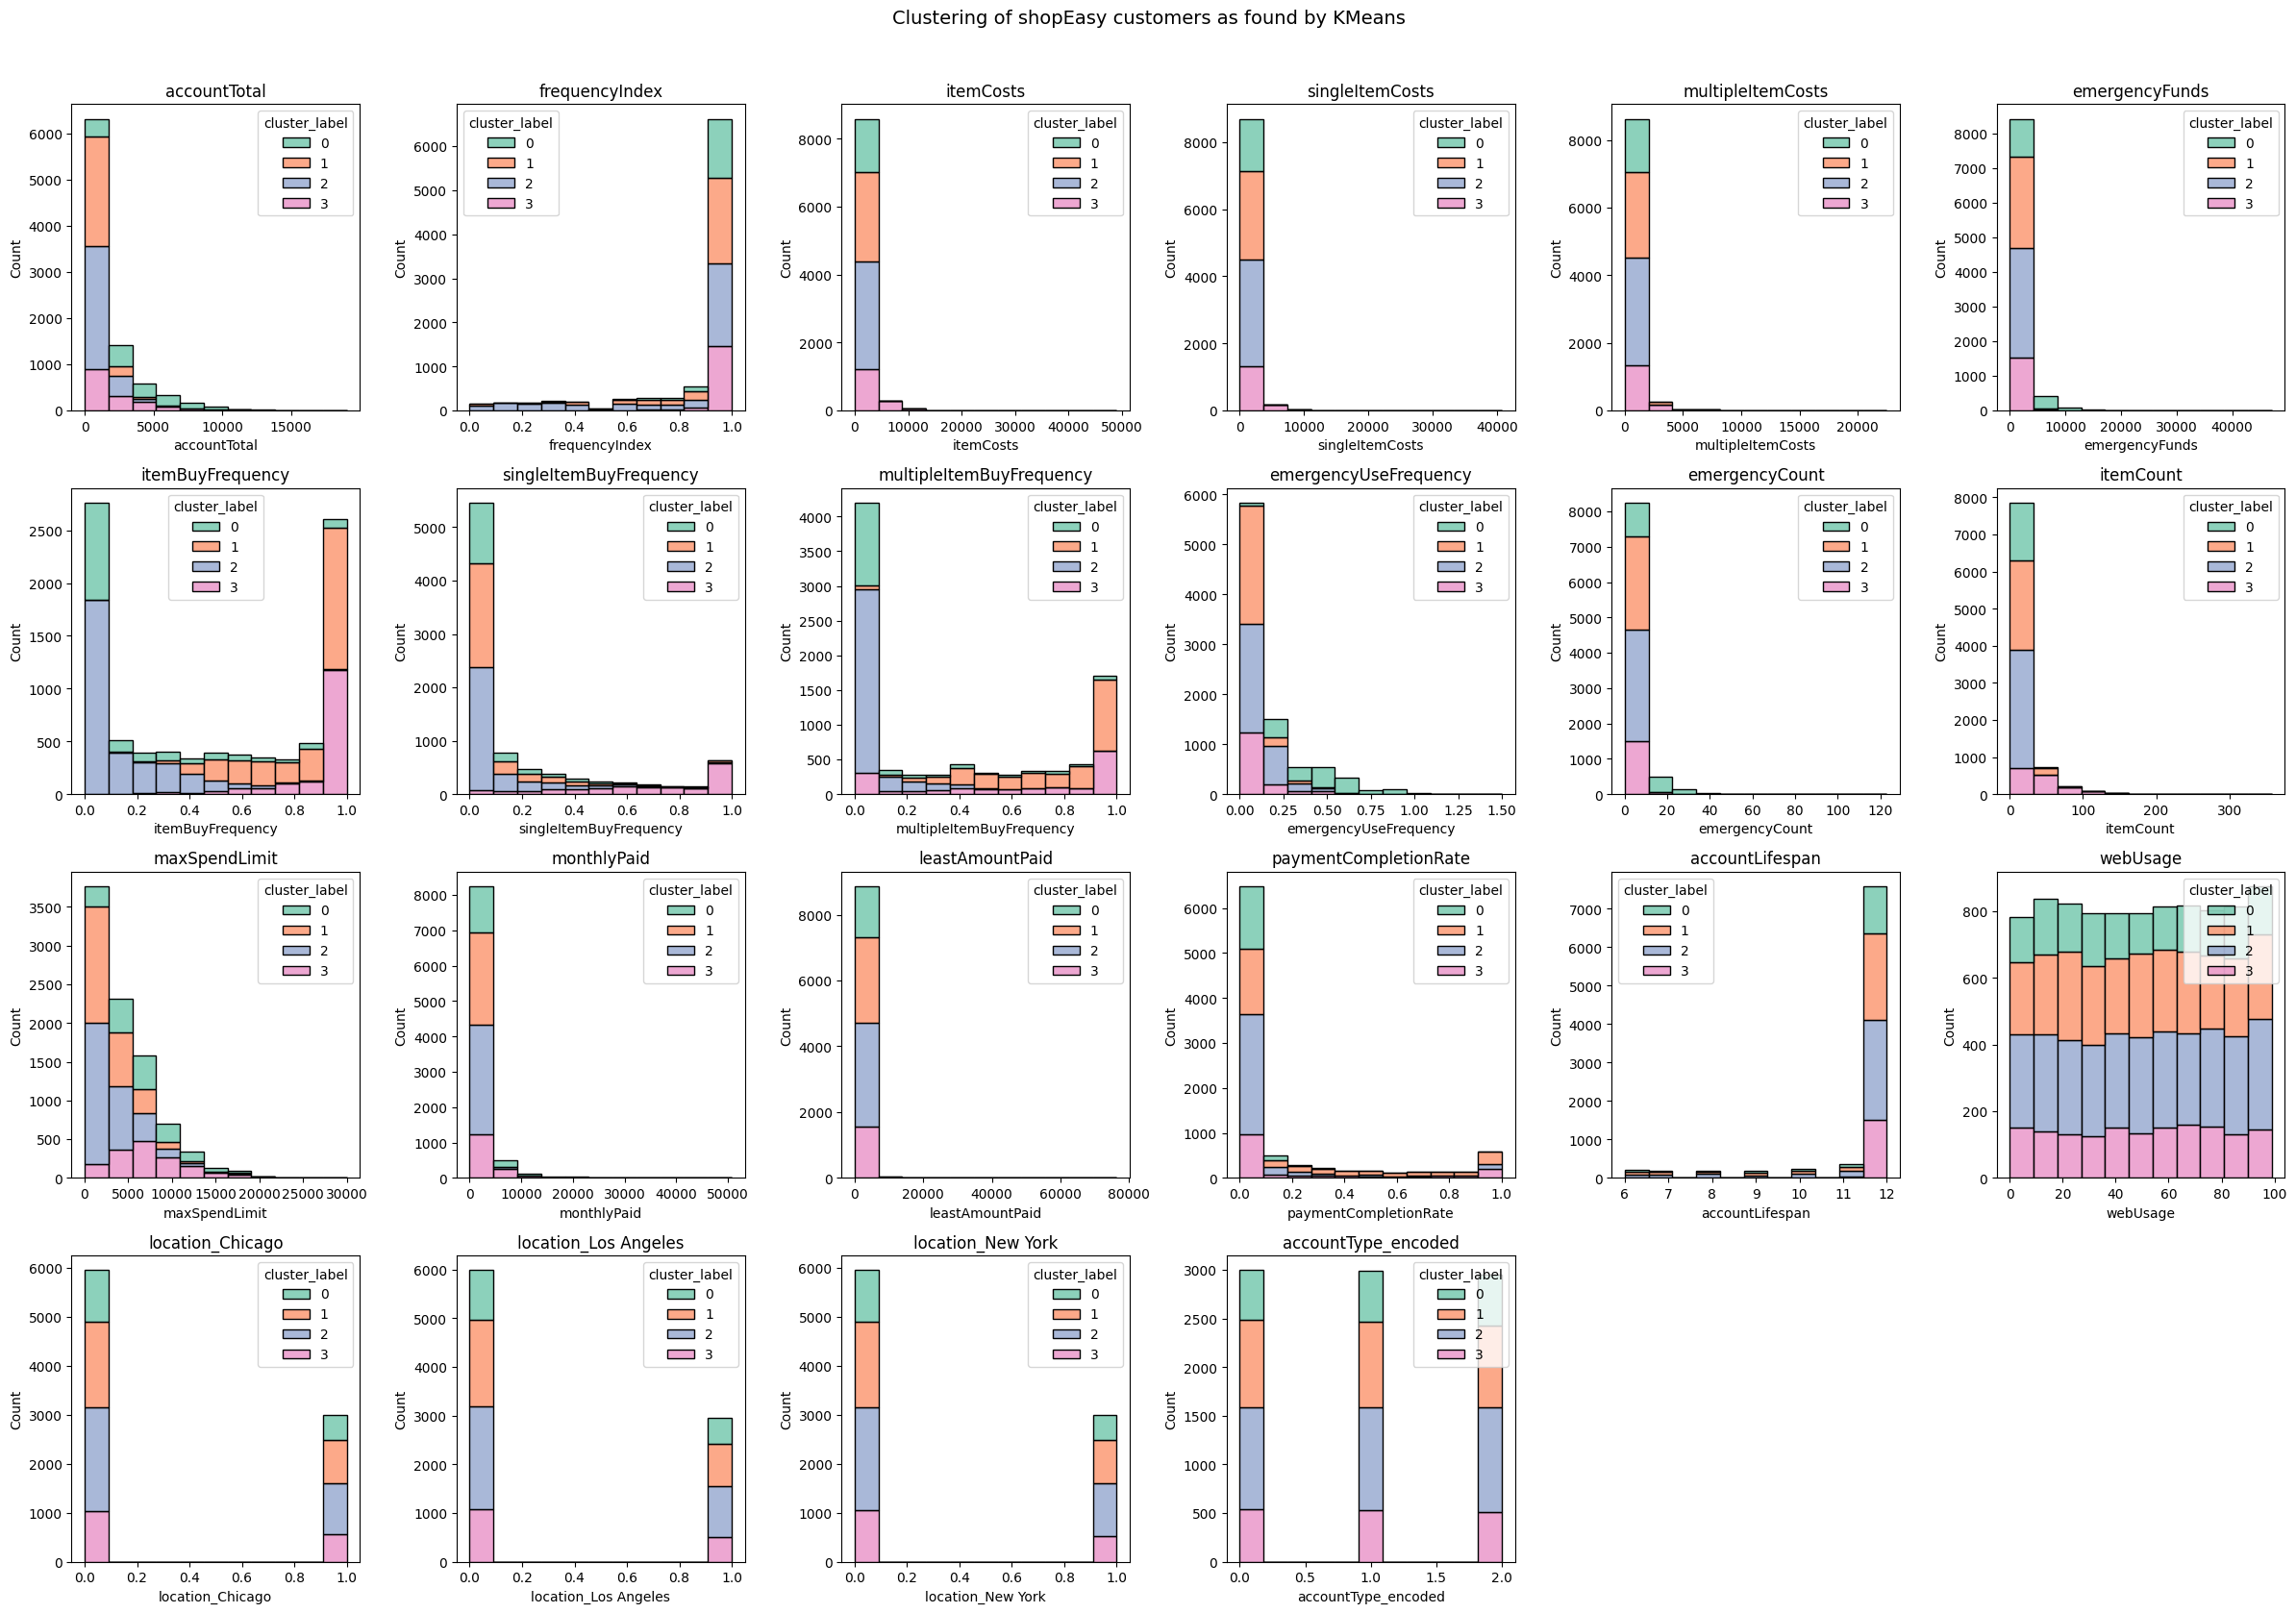

In [502]:
plot_clusters_sizes(y_kmeans, "KMeans Clusters Sizes")
plot_clusters_distribution(y_kmeans, "Clustering of shopEasy customers as found by KMeans")

## Hierarchical Clustering

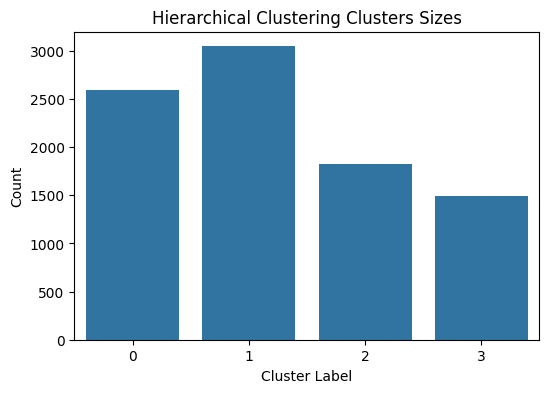

cluster_label
1    3046
0    2590
2    1822
3    1491
Name: count, dtype: int64


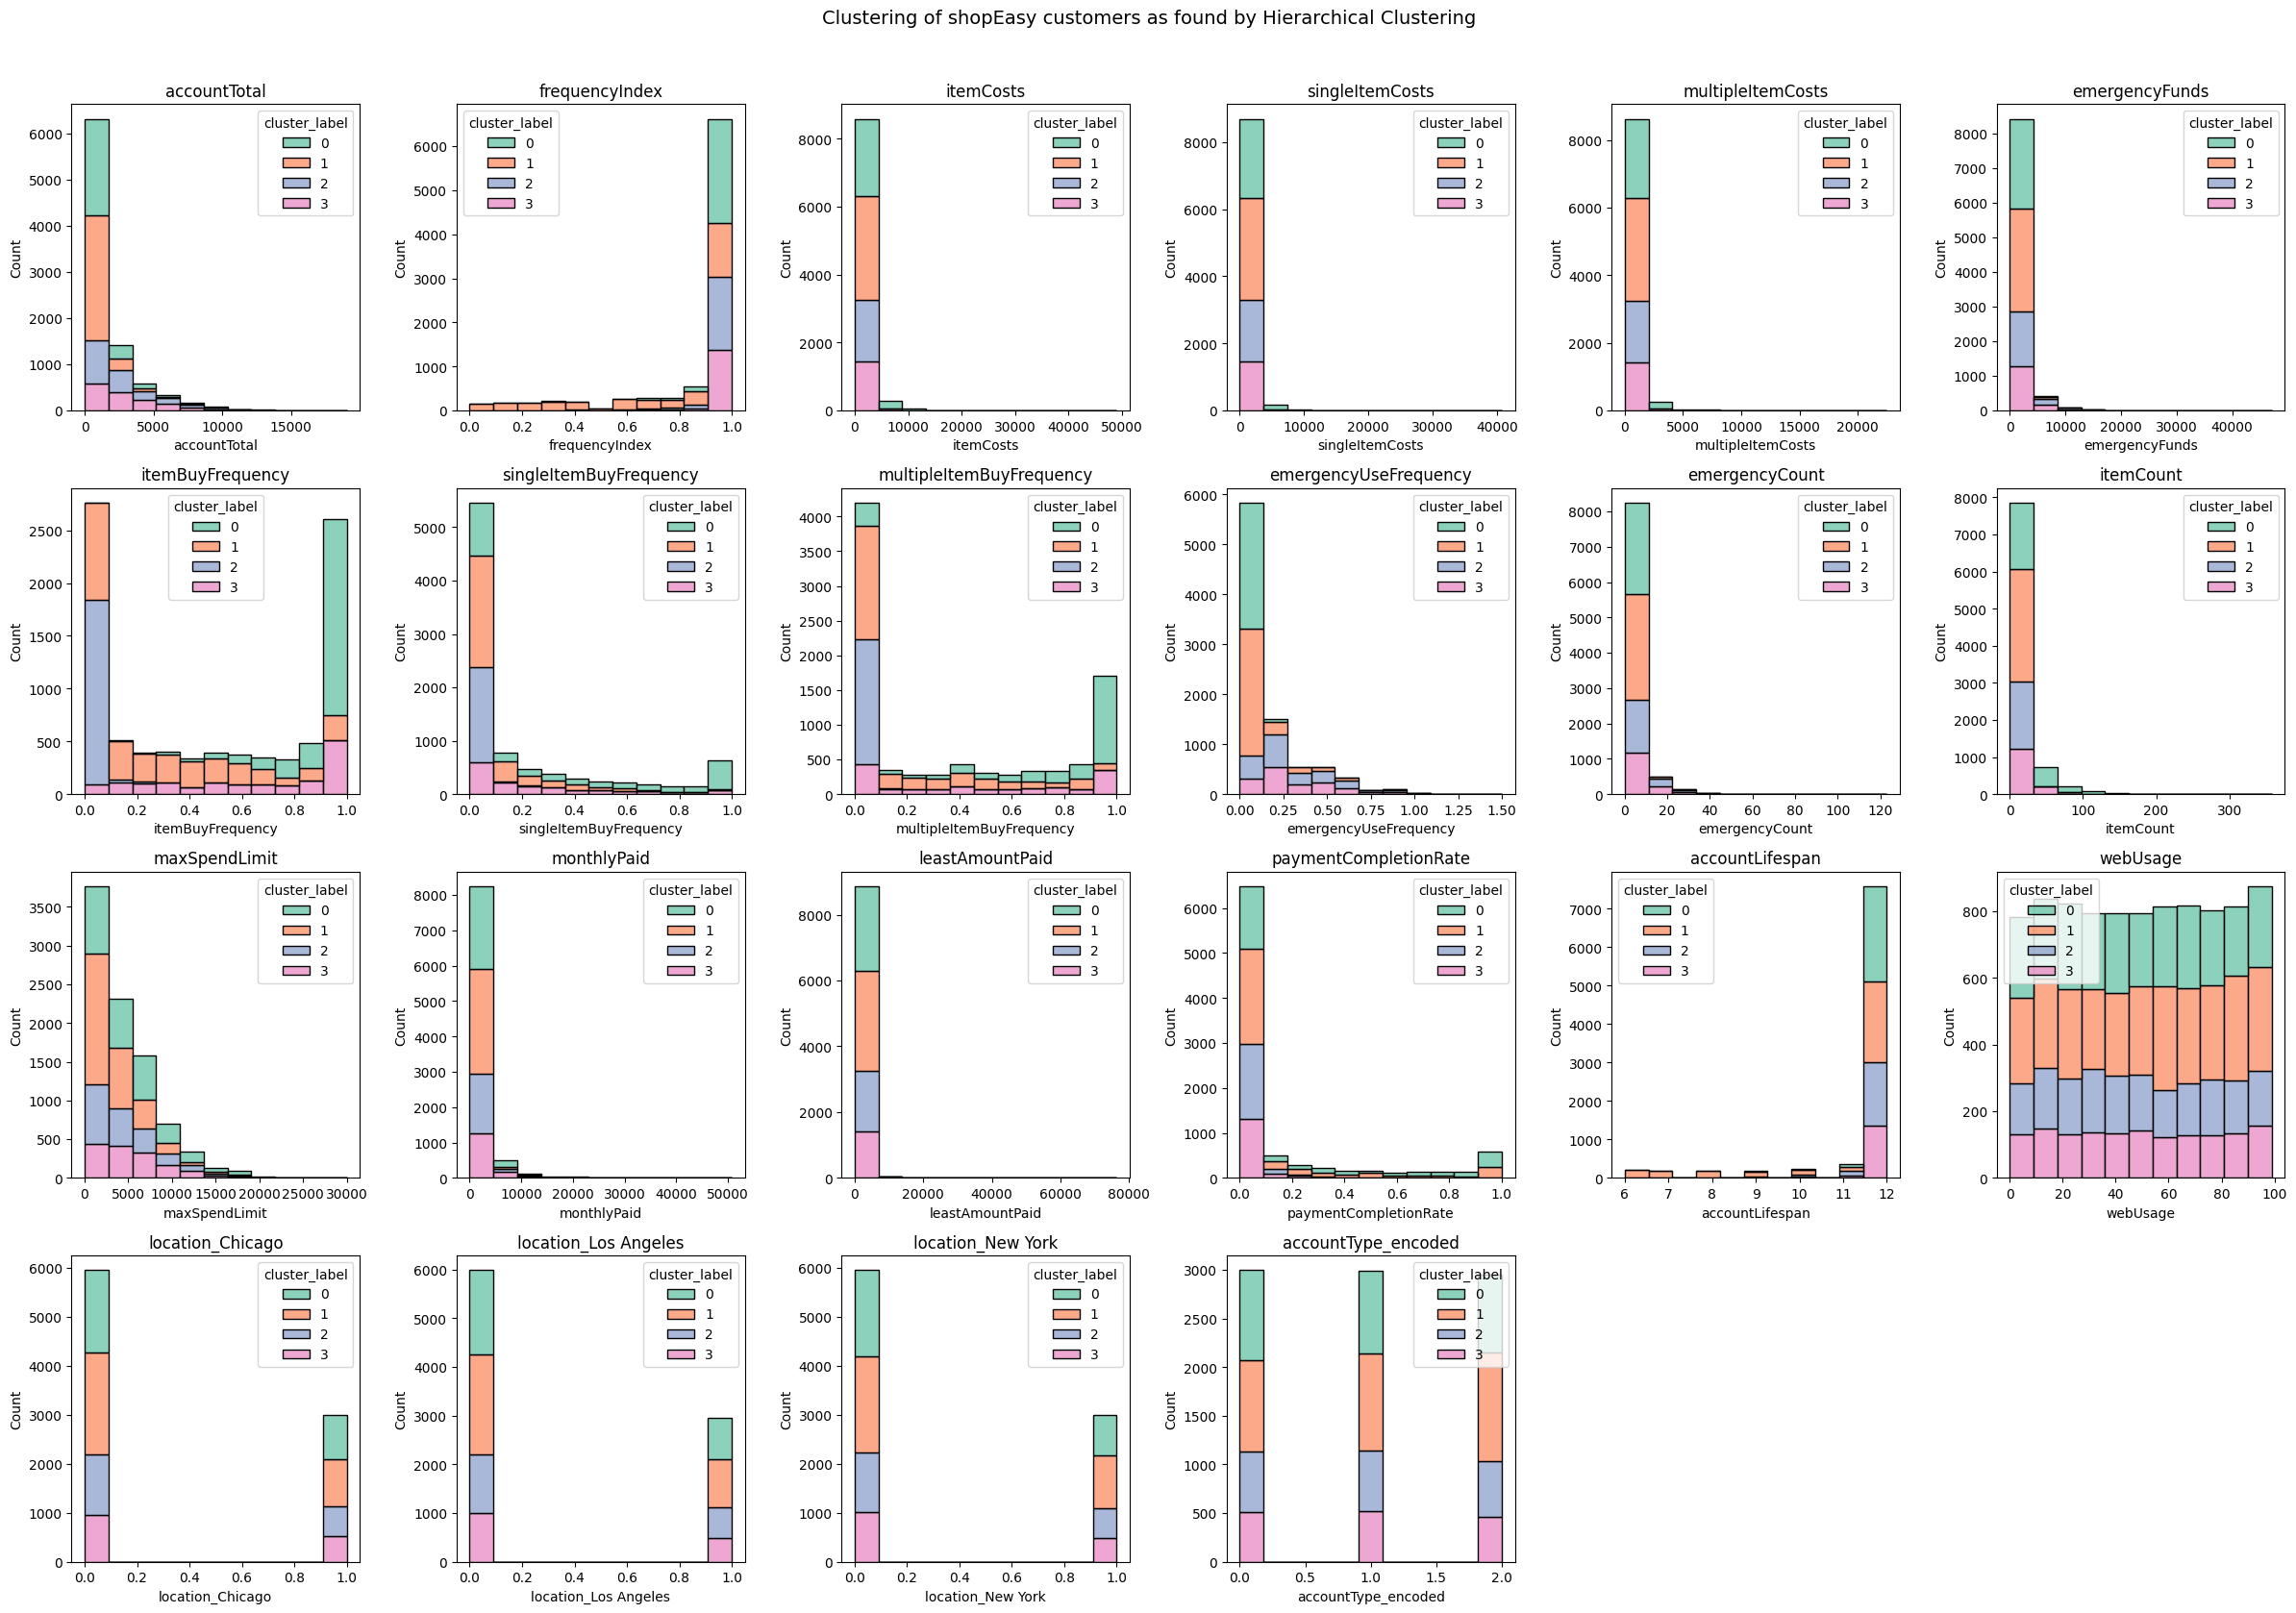

In [501]:
plot_clusters_sizes(y_hc, "Hierarchical Clustering Clusters Sizes")
plot_clusters_distribution(y_hc, "Clustering of shopEasy customers as found by Hierarchical Clustering")